<center>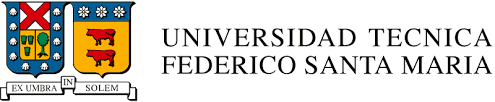</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 2  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Árboles y Bosques de Regresión
* Máquinas de ensamblado
* Redes Neuronales


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 30 de Junio, en horario de clases.
* Fecha de entrega: 01 de Julio. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, SGDClassifier
from tabulate import tabulate
from scipy.stats import norm

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, r2_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier


# 1. Predicción de la calidad de vinos

Los árboles de regresión, también conocidos como árboles de decisión para regresión, son un tipo de algoritmo de aprendizaje supervisado que se utiliza para predecir valores numéricos. Son una potente herramienta para tareas de regresión y ofrecen varias ventajas y consideraciones.

<center><img src=https://cdn.shopify.com/s/files/1/1277/3667/files/an-essential-guide-1_480x480.png?v=1674719515></center>


Los conjuntos de datos provienen del UCI Machine Learning Repository. Estos conjuntos de datos están relacionados con las variantes tintas y blancas del vino portugués "Vinho Verde".

Estos dos conjuntos de datos contienen varias propiedades químicas de distintos vinos, como la acidez, el pH, el contenido de alcohol, etc. La variable objetivo es la calidad del vino la cual se puntúa del 0 al 10. Puede considerarse una tarea de clasificación o regresión en la que las clases están ordenadas y no balanceadas. Para esta pregunta nos centraremos en la tarea de regresión.

Variables de entrada (basadas en pruebas físico-químicas):
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* tipo

Variable objetivo (basadas en datos sensoriales):
* quality



Para obtener más información sobre este conjunto de datos, revise el siguiente link: https://www.kaggle.com/datasets/rajyellow46/wine-quality.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Aplique lo aprendido en la tarea 1 y obtenga los datos de la forma que le sea más conveniente siempre y cuando estos sean los del link de la descripción.

In [16]:
# from google.colab import files
# files.upload()

In [17]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [18]:
# !kaggle datasets download -d rajyellow46/wine-quality

In [19]:
# !unzip /content/wine-quality.zip

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 1.1.1 Exploración del conjunto de datos

Explore el conjunto de datos y responda brevemente las siguientes preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Existen datos faltantes, si es así en qué atributos faltan datos y cuantos faltan?
    
> c) ¿Qué técnicas conoce para rellenar los datos faltantes de los atributos del dataset? (si no conoce ninguna investigue al menos 2)




In [3]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
type,object,6497,2,0,0.000000
fixed acidity,float64,6487,106,10,0.153917
volatile acidity,float64,6489,187,8,0.123134
citric acid,float64,6494,89,3,0.046175
residual sugar,float64,6495,316,2,0.030783
chlorides,float64,6495,214,2,0.030783
free sulfur dioxide,float64,6497,135,0,0.000000
total sulfur dioxide,float64,6497,276,0,0.000000
density,float64,6497,998,0,0.000000
pH,float64,6488,108,9,0.138525


> a) Se observa que el tipo de vino corresponde a una variable categórica al igual que la variable objetivo, aunque esté compuesta por números, toma valores discretos dentro de un ranking de clasificación. Mientras que el resto de las variables corresponde a variables numéricas.

> b) En cuanto a los datos faltantes, se observan varios registros con datos tipo NaN, lo que indica que esos datos no están disponibles, por lo que sí hay datos faltantes y se muestran en la siguiente tabla:

In [4]:
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Create a DataFrame with the NaN columns and their counts
nan_table = pd.DataFrame({'Atributo con registros vacíos': nan_columns,
                          'Número de registros vacíos': nan_counts})

# Print the NaN table
print(nan_table)

                 Atributo con registros vacíos  Número de registros vacíos
fixed acidity                    fixed acidity                          10
volatile acidity              volatile acidity                           8
citric acid                        citric acid                           3
residual sugar                  residual sugar                           2
chlorides                            chlorides                           2
pH                                          pH                           9
sulphates                            sulphates                           4


> c) A continuación se enumeran las técnicas investigadas:
>   >1) Si el dataset contiene numerosas filas con registros desconocidos o vacíos, entonces una opción es eliminar esas columnas, pues podrían considerarse como datos no válidos o no representativos de la situación que se desea capturar para entrenar el modelo.
>   >2) Si alguna "feature" en particular muestra gran catidad de registros vacíos, entonces una opción es entrenar al modelo sin la feature problemática, pues esa feature no está bien representada en el registro de datos para el dataset.
>   >3) Mean/median imputation: Consiste en, si el dataset muestra un número reducido de valores desconocidos, reemplazar los valores por la media o mediana (según sea el caso más representativo de la situación) del atributo o feature. Esta técnica asume que la pérdida de datos atiende a procesos completamente aleatorios (MCAR, "missinf completely at random"; por sus siglás en inglés) o a proceso aleatorios (MAR).


In [5]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.1.2 Exploración de Features

En problemas de regresión, el desbalance de la variable objetivo se refiere a una distribución desigual de los valores de la variable objetivo en el conjunto de datos. Esto significa que hay una presencia significativa de valores en una clase o rango de valores en comparación con otras clases o rangos de valores. Considerando lo anterior responda las siguientes preguntas:

> a) Grafique histogramas y box plots de cada variable y comente acerca de la distribución de las características y de la variable objetivo

> b) ¿Considera que están *balanceados* los valores de la variable objetivo?

> c) ¿Cómo afecta el desbalance en problemas de regresión en términos de la predicción y de la evaluación de un modelo?




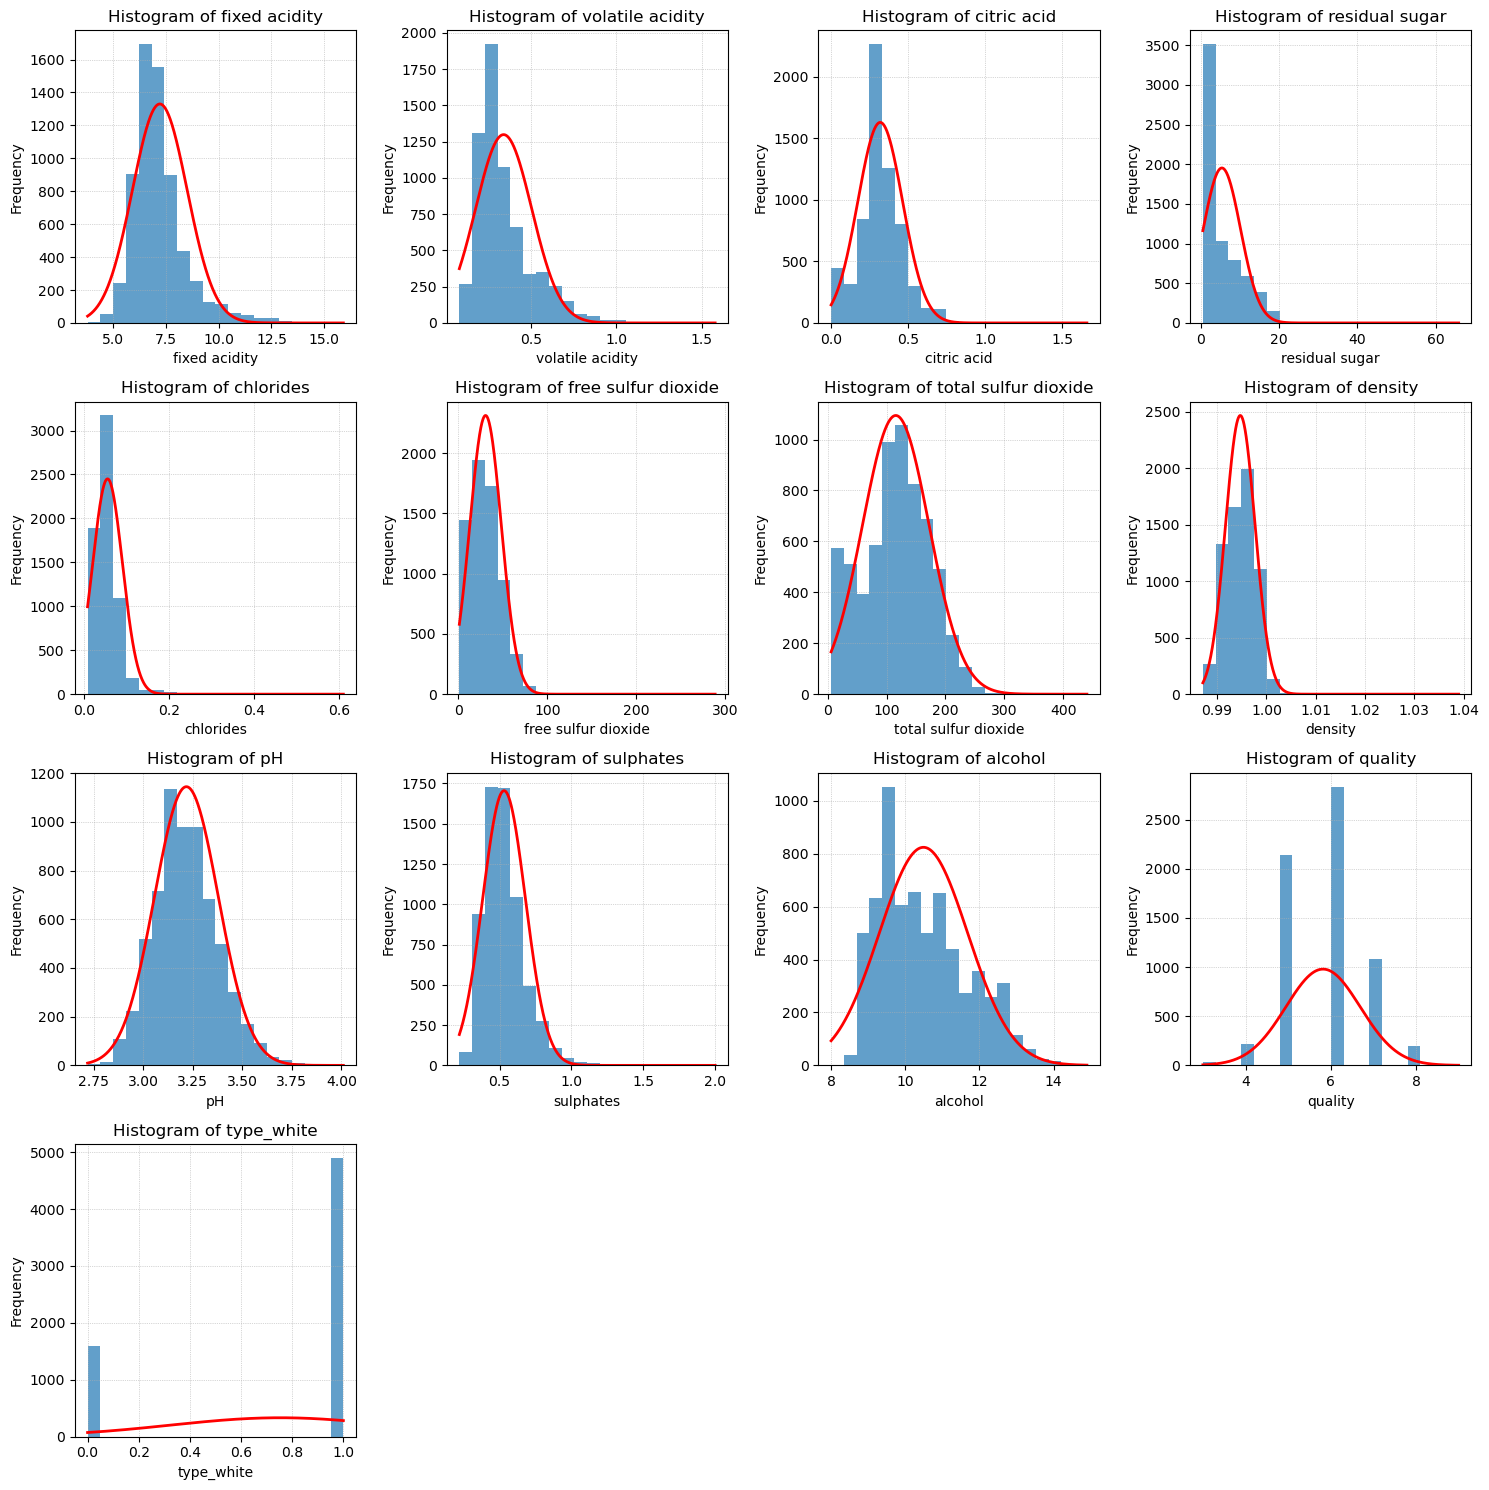

In [6]:
df = pd.get_dummies(df,drop_first=True)


# Get the column names of the DataFrame
column_names = df.columns 

# Calculate the number of rows and columns for the subplots
num_rows = int(np.ceil(len(column_names) / 4))
num_cols = min(len(column_names), 4)

# Create subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Iterate over each column and plot the histogram with PDF
for i, column in enumerate(column_names):
    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols

    # Select the current subplot
    ax = axes[row_index, col_index]

    # Plot the histogram
    ax.hist(df[column], bins=20, density=False, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + column)

    # Calculate the mean and standard deviation of the data
    mean = np.mean(df[column])
    std = np.std(df[column])

    # Generate an x-axis range for the PDF curve with a finer mesh
    x = np.linspace(np.min(df[column]), np.max(df[column]), 1000)

    # Compute the PDF values using a normal distribution with the calculated mean and standard deviation
    pdf = norm.pdf(x, mean, std)

    # Scale the PDF values to match the frequency scale
    pdf_scaled = pdf * len(df[column]) * np.diff(ax.get_xlim())[0] / 20

    # Plot the scaled PDF curve on top of the histogram
    ax.plot(x, pdf_scaled, 'r-', linewidth=2)

    # Add a minor grid to the plot
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)

# Remove empty subplots
if len(column_names) < num_rows * num_cols:
    for i in range(len(column_names), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
type_white               Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

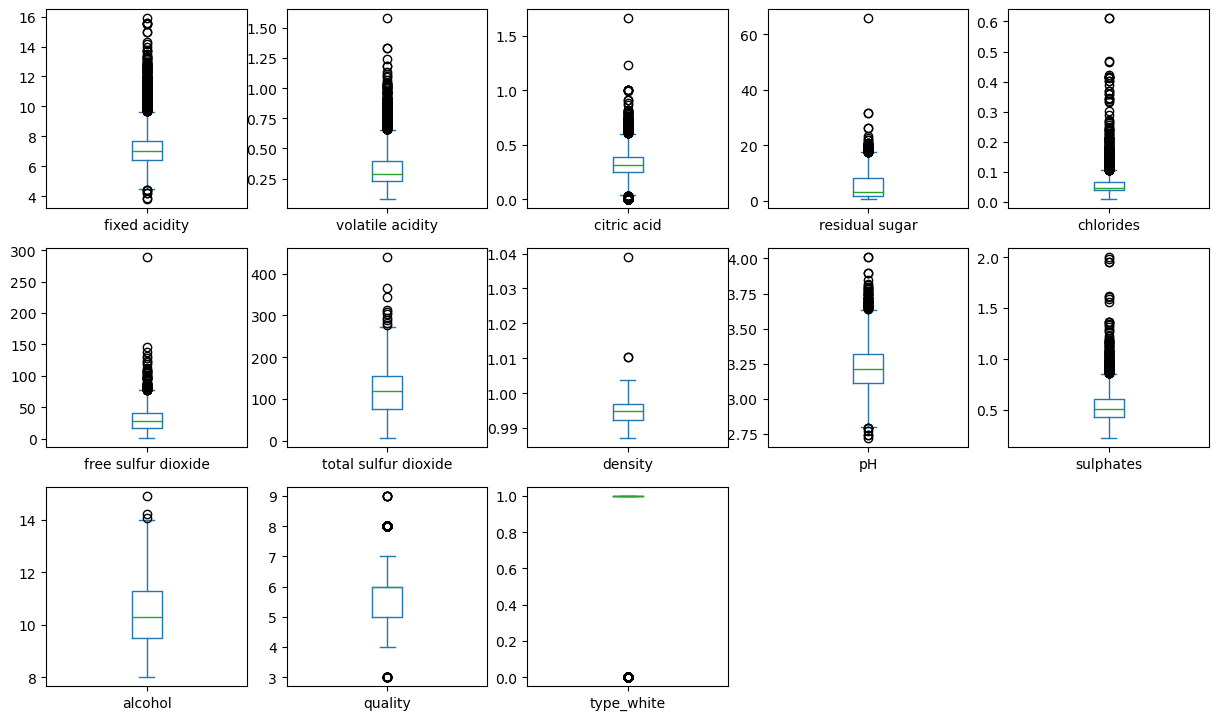

In [7]:
# buscar outliers con boxplots
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

<Axes: >

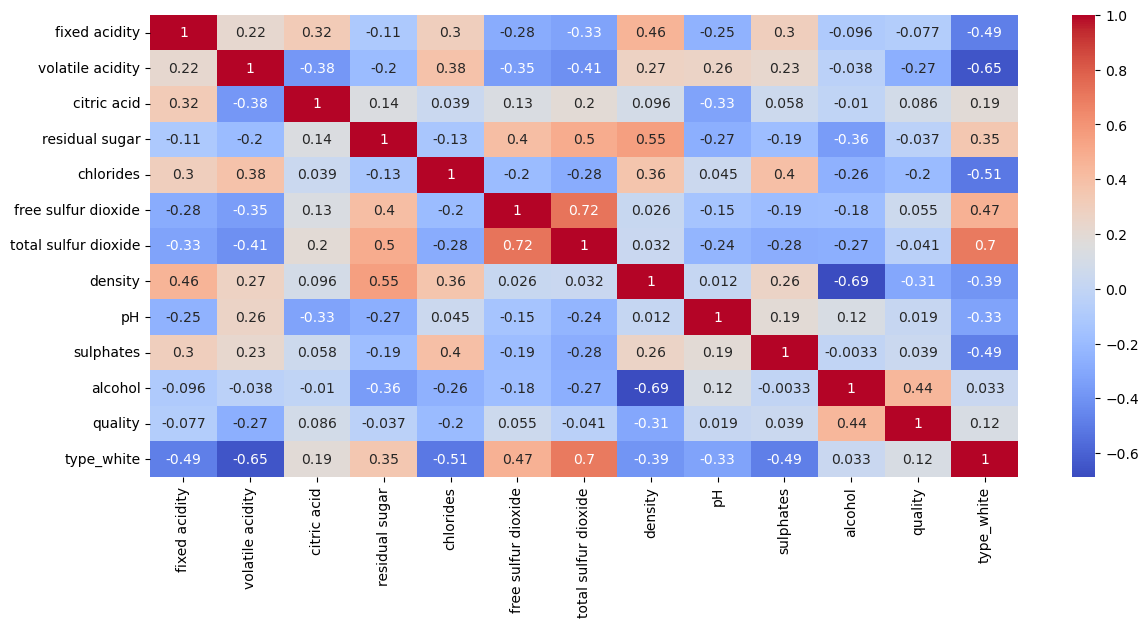

In [8]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(), annot = True,cmap = 'coolwarm')

> a) Se observa que cada feature sigue una distribución distinta, marcada bastante por los valores extremos de cada uno. Lo anterior se observa en el histograma y en las formas de las distribución de cada variable, pero con mayor razón se observa en el diagrama de cajas, donde destacan los outliers.

> b) De acuerdo a lo expuesto, es visible que existe un *desbalance* en la distribución de los valores de las features.

> c) Hay varios aspectos en los que el *desbalance* puede afectar el desempeño de una predicción, a continuación se describen algunos:
>   >1) El bias del modelo se puede ver afectado por la dominancia de las instancias más numerosas en el dataset.
>   >2) Las métricas para evaluar el desempeño del modelo se podrían ver afectadas, por ejemplo, el *accurracy* podría verse afectado si el predictor tiene un alto índice de predicciones sobre la clase mayoritaria, aún cuando el modelo prediga erróneamente los datos extremos. Lo anterior vuelve más complejo la evaluación del desempeño de un predictor.
>   >3) Si el dataset muestra un *desbalance*, podría ser indicativo que su data es poco reprensentativa, induciendo *overfitting* al modelo, ajustando la predicción a los datos con mayor presencia y empobreciendo la capacidad de generalización del modelo.


### 1.1.3 Separación de conjuntos

> a) Separe el conjunto entre variables características y variable objetivo.

> b) Separe el conjunto de datos en un conjunto de entrenamiento y conjunto de prueba, utilizando una proporción 80%-20% respectivamente.

> c) Una vez separado los conjuntos, obtenga la media de cada variable con datos faltantes en el conjunto de **entrenamiento** y reemplace los valores faltantes (NaN) de ambos conjuntos (entrenamiento y prueba) con dicha media.

> a)
> 
> b)

In [9]:
X = df.drop(['quality'], axis =1)
X_mod = X
y = df['quality']
y_mod = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> c)

In [10]:
# Checking which columns have empty values
empty_columns = df.columns[df.isnull().any()].tolist()

# Create a table showing columns with empty values
empty_columns_table = pd.DataFrame({'Columns with Empty Values': empty_columns})

print(empty_columns_table)


  Columns with Empty Values
0             fixed acidity
1          volatile acidity
2               citric acid
3            residual sugar
4                 chlorides
5                        pH
6                 sulphates


In [11]:
# To check the process, the mean values before and after doing the replacement should be the same
column_means_before = X_train[empty_columns].mean()

# Replacing the NaN values of the df for the mean value of its column
for column in X_train.columns:
    if X_train[column].isna().any():
        column_mean = X_train[column].mean()
        X_train[column].fillna(column_mean, inplace=True)
        ### LLENADO DE X_TEST CON X_MEAN DEL TRAIN SET
        if X_test[column].isna().any():
            X_test[column].fillna(column_mean, inplace=True)
# Mean value after doing the replacement
column_means_after = X_train[empty_columns].mean()

#Checking the comparisson
comparison_X = pd.DataFrame({'Column Means (Before)': column_means_before,
                              'Column Means (After)': column_means_after})

# Print the comparison DataFrame
print(comparison_X)


                  Column Means (Before)  Column Means (After)
fixed acidity                  7.226156              7.226156
volatile acidity               0.340018              0.340018
citric acid                    0.319444              0.319444
residual sugar                 5.425115              5.425115
chlorides                      0.055922              0.055922
pH                             3.218356              3.218356
sulphates                      0.533421              0.533421


Aquí se llenaron los valores vacíos que habían en el conjunto de entranamiento, pero también en el de test (de haberlos), pues el modelo se entrenará sobre un conjunto de datos sobre el cual, si un valor está faltando, se asume que lo considera como la media de los valores de entrenamiento y, por lo anterior, cualquier muestra que reciba con un registro vacío debe entenderse como que está rellenado con el valor medio entrenado.

> d) Estandarice las variables categóricas numéricas no binarias, es decir, todas excepto el tipo de vino y la variable objetivo.

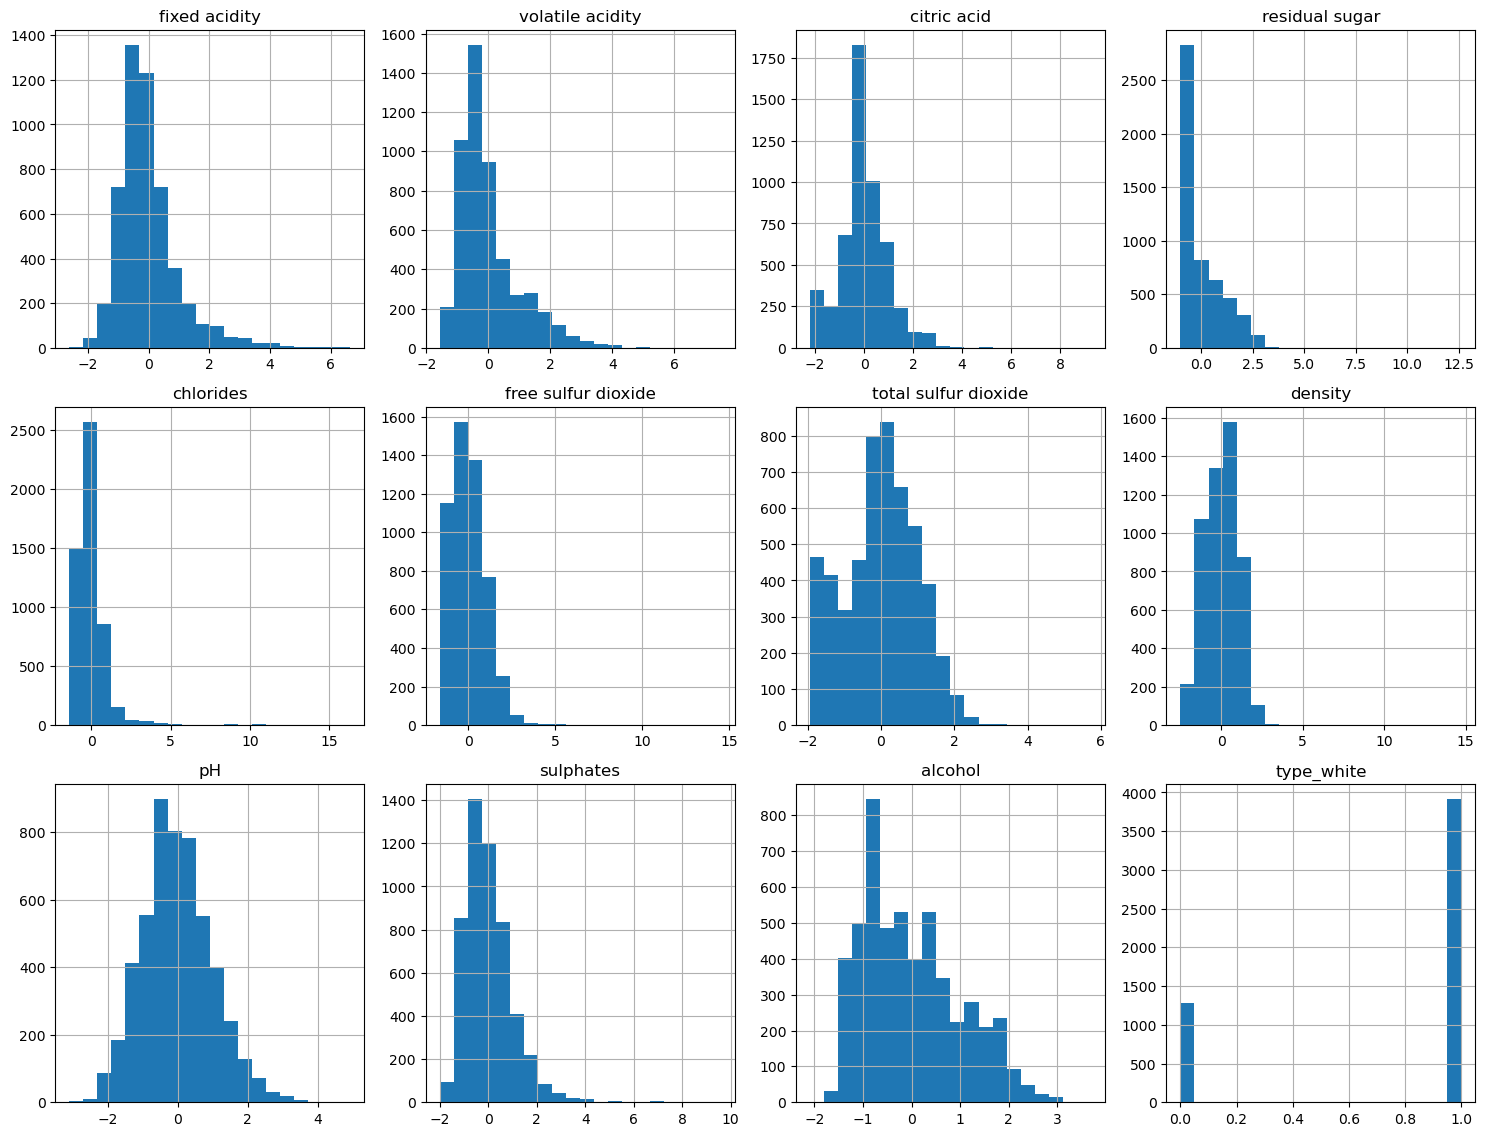

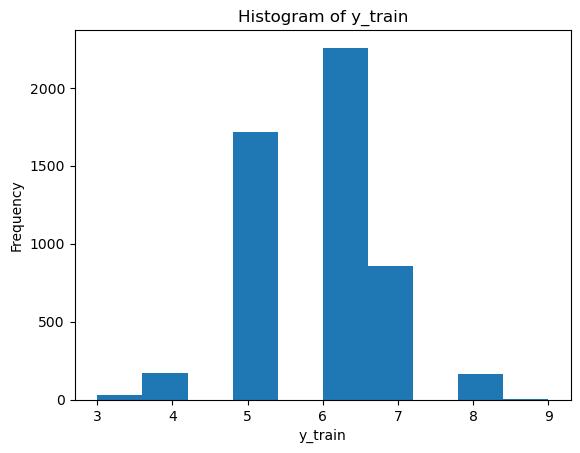

In [12]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = [col for col in X_train.columns if len(df[col].unique()) > 2]


for col in cols_to_normalize:
    X_train[col] = X_scaler.fit_transform(X_train[[col]])
    X_test[col] = X_scaler.transform(X_test[[col]])
X_train.hist(figsize=(15, 15), layout=(4, 4), bins=20)
plt.tight_layout()
plt.show()

plt.hist(y_train, bins=10)
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.show()


> Se muestra la estandarización, pero no hace falta mostrar la forma de la distribucón porque es la misma de anteriormente.

> e) Grafique la relevancia de cada variable con respecto a la variable objetivo utilizando la información mutua entre ambas, en otras palabras: MutualInformation($x_i,y$) siendo $x_i$ la $i$-ésima variable.

In [13]:
mi_scores = mutual_info_classif(X_train, y_train)
df_mi_scores = pd.DataFrame({'Features': X_train.columns, 'MI Scores': mi_scores})
df_mi_scores = df_mi_scores.sort_values(by='MI Scores', ascending=True)
# Create a bar plot of feature names and MI scores
fig, ax = plt.subplots()
ax.bar(df_mi_scores['Features'], df_mi_scores['MI Scores'])
ax.set_xlabel('Features')
ax.set_ylabel('Mutual Information Score')
ax.set_title('Mutual Information Scores for Features (Descending Order)')
plt.xticks(rotation=45)
plt.show()


AttributeError: 'NoneType' object has no attribute 'split'

> f) Cree un segundo conjunto quitando las características que menos aportan información según lo observado en su gráfico de la pregunta anterior. El número de características a quitar es algo que usted deberá escoger y argumentar por qué lo escogió. En adelante al conjunto con todas las variables lo llamaremos conjunto $\textit{A}$ y al nuevo conjunto creado con las características quitadas lo llamaremos conjunto $\textit{B}$.

Se decide que características eliminar basandose en las que estén por debajo de la media de mutual information general. En este caso particular corresponden a 7 features.

In [ ]:
mi_mean = mi_scores.mean()
cols_to_eliminate = df_mi_scores[df_mi_scores['MI Scores'] < mi_mean]['Features'].tolist()


eliminated_features_df = pd.DataFrame({'Features to Eliminate': cols_to_eliminate})

print(eliminated_features_df)

  Features to Eliminate
0                    pH
1            type_white
2         fixed acidity
3             sulphates
4   free sulfur dioxide
5           citric acid
6      volatile acidity


> Aquí se muestran las features a eliminar para la construcción del conjunto de datos B

In [ ]:
A_X_train = X_train
A_X_test = X_test
A_y_train = y_train
A_y_test = y_test

def B_set(A_X_train,A_X_test,A_y_train,A_y_test,cols_to_eliminate):
    B_X_train, B_X_test = A_X_train, A_X_test
    for col in cols_to_eliminate:
        B_X_train = B_X_train.drop([col], axis =1)
        B_X_test = B_X_test.drop([col], axis =1)
    B_y_train = A_y_train
    B_y_test = A_y_test
    return B_X_train, B_X_test, B_y_train, B_y_test

B_X_train, B_X_test, B_y_train, B_y_test = B_set(A_X_train, A_X_test, A_y_train, A_y_test, cols_to_eliminate)

## 1.2 Modelos de Regresión

Para las siguientes preguntas usted debera entrenar, validar y evaluar los modelos utilizando los conjuntos $A$ y $B$ por separado, para luego hacer las respectivas comparaciones entre ambos. Cada modelo tiene sus propios hiperparámetros que usted deberá ajustar a través de una búsqueda en grilla, obteniendo así un conjunto de modelos distintos para posteriormente comparar las métricas de evaluación sobre el conjunto de prueba. Usted estará explorando un subconjunto del espacio de hipótesis variando los hiperparámetros que se le indiquen en cada modelo usando el módulo gridsearchcv de la librería sklearn. En el módulo gridsearchcv fije fije los parámetros de la forma: 

Siendo estimator el modelo a utilizar, scoring, la métrica para evaluar el modelo y refit=True para una vez probado todo el subconjunto del espacio de hipótesis, escojer el mejor modelo y entrnarlo con todo el conjunto de entrenamiento.

**Nota:** puede utilizar parte del código utilizado en la tarea 1 de esta asignatura.

> Aquí se propone un ajuste inicial, sólo para tener una métrica de comparación con un modelo ya conocido de la experiencia y, se dejan algunas consideraciones realizadas.

* Dado que se trata de un problema de clasificación de la calidad del vino y, que se observa que en el dataset sólo hay cantidades discretas en el target (no valores decimales para la clasificación de la calidad), sería posible tratar el problema como uno de clasificación y no de regresión.
* Sin embargo, dado que el ranking (clasificación de la calidad) guarda relación con el puntaje asignado (por ejemplo, una nota 5.6 está más cerca del 6 que del 5), tiene sentido tratar el problema como uno de regressión, que consista en estimar la clasificación de la calidad del vino, que puede históricamente se registra algún valor pertenenciente a {3,4,5,6,7,8,9}, como se muestra más abajo:

In [ ]:
value_counts = y.value_counts().sort_index()
# Iterate over the values and counts in ascending order
for value, count in value_counts.items():
    print("Valor:", value, "Cantidad:", count)


Valor: 3 Cantidad: 30
Valor: 4 Cantidad: 216
Valor: 5 Cantidad: 2138
Valor: 6 Cantidad: 2836
Valor: 7 Cantidad: 1079
Valor: 8 Cantidad: 193
Valor: 9 Cantidad: 5


* Además, reforzando lo anterior, está el orden en que fue propuesto el presente, con títulos de regresión para el desarrollo de este trabajo.
* **Finalmente**, por todo lo anterior, se propone trabajar con modelos de regresión y, dada la naturaleza del target, redondear de manera simple, al entero, el valor de la predicción.

In [ ]:
# Define the model and the hyperparameter grid

cv_folds=KFold(n_splits=5, shuffle=True)


estimator = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

hypereg_A = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

######### AQUI POR ALGUNA RAZÓN NO ME DEJABA OCUPAR EL MISMO GridSearchCV 


hypereg_B = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )


regresion_A = hypereg_A.fit(A_X_train, A_y_train.ravel())
regresion_B = hypereg_B.fit(B_X_train, B_y_train.ravel())
validation_mse_A = -np.max(regresion_A.cv_results_['mean_test_score'])
validation_mse_B = -np.max(regresion_B.cv_results_['mean_test_score'])
# Get the best model selected from the grid search
model_A_regresion = regresion_A.best_estimator_
model_B_regresion = regresion_B.best_estimator_

# Create a DataFrame to display the selected models and MSE
selected_model_df_regression = pd.DataFrame(columns=['Model', 'Best Estimator', 'Validation MSE'])
selected_model_df_regression.loc[0] = ['Model A', model_A_regresion, validation_mse_A]
selected_model_df_regression.loc[1] = ['Model B', model_B_regresion, validation_mse_B]

if validation_mse_A <= validation_mse_B:
    y_pred_regresion = regresion_A.predict(A_X_test)
    y_test_regr = A_y_test
    model_regr = 'A'
else:
    y_pred_regresion = regresion_B.predict(B_X_test)
    y_test_regr = B_y_test
    model_regr = 'B'

selected_model_df_regression.head()

c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Nicolás\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

,Model,Best Estimator,Validation MSE
0,Model A,"LogisticRegression(penalty='l1', random_state=...",0.659038
1,Model B,"LogisticRegression(C=0.1, penalty='l1', random...",0.735029


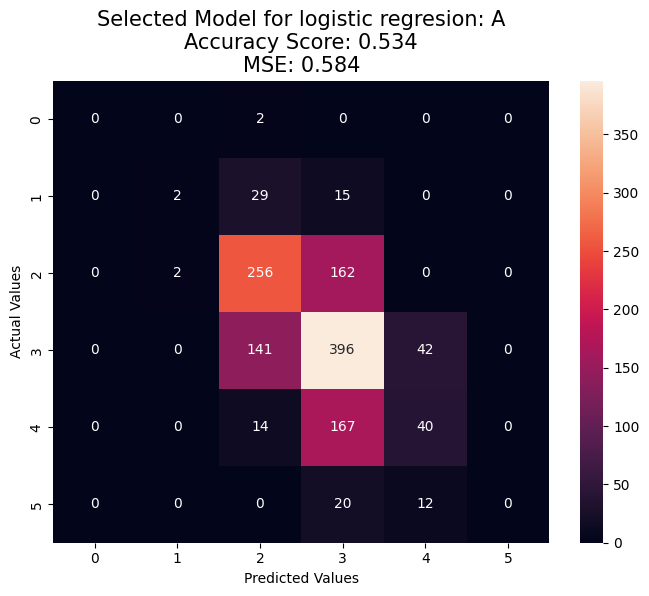

In [ ]:
# Calculate the confusion matrix and accuracy score for selected model
score_regresion = round(accuracy_score(y_test_regr, y_pred_regresion), 3)
score_regresion_mse = round(mean_squared_error(y_test_regr, y_pred_regresion), 3)
cm = confusion_matrix(y_test_regr, y_pred_regresion)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot confusion matrix for the selected model
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Selected Model for logistic regresion: ' + model_regr + '\nAccuracy Score: {0}'.format(score_regresion) +'\nMSE: {0}'.format(score_regresion_mse), size=15)

# Show the plot
plt.show()

### 1.2.1 Árbol de regresión

Entrene un árbol de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

> a) max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

> b) max_leaf_nodes: Probar con los valores 10, 50, 100. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas:

> c) ¿Cuántos modelos de árboles de regresión le quedan en total?

> d) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación de la grilla utilizando la métrica de evaluación $mean\_squared\_error$.

**Nota:** Recuerde que estos experimentos debe realizarlos para ambas representaciones de los conjuntos ($A$ y $B$).



> a) max_depth: Este parámetro especifica la profundidad máxima del árbol de regresión, por lo que al modificar este hiperparámetro se modifica la cantidad de niveles que podría llegar a tener el árbol. En algunos casos una profunidad demasiado elevada podría conducir a overfitting de los datos, por lo que resulta razonable dejar este valor como hiperparámetro del modelo.

> b) max_leaf_nodes: Este parámetro especifica el número máximo de nodos permitidos en el árbol, por lo que al modificar este hiperparámetro se modifica la complejidad del árbol. Aquí nuevamente demasiada complejidad en el árbol podría conducir a overfitting del modelo, por lo nuevamente resulta razonable dejar esto sujeto como hiperparámetro.

> c) En total quedan 9 modelos, pues se tienen tres posibilidads para cada max_depth, por ejemplo. Logrando así 9 posibilidades.

> d) 

In [ ]:
# Define the model and the hyperparameter grid

cv_folds=KFold(n_splits=5, shuffle=True)

estimator = DecisionTreeRegressor(max_depth=2, 
                   max_leaf_nodes=10                
                   )

param_grid = {'max_depth': [2 , 20, 200], 
              'max_leaf_nodes': [10, 50, 100]
              }

hypereg_A = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

hypereg_B = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )


regresion_tree_A = hypereg_A.fit(A_X_train, A_y_train.ravel())
regresion_tree_B = hypereg_B.fit(B_X_train, B_y_train.ravel())
validation_mse_A = -np.max(regresion_tree_A.cv_results_['mean_test_score'])
validation_mse_B = -np.max(regresion_tree_B.cv_results_['mean_test_score'])
# Get the best model selected from the grid search
model_A_regresion_tree = regresion_tree_A.best_estimator_
model_B_regresion_tree = regresion_tree_B.best_estimator_

# Create a DataFrame to display the selected models and MSE
selected_model_df_regression_tree = pd.DataFrame(columns=['Model', 'Best Estimator', 'Validation MSE'])
selected_model_df_regression_tree.loc[0] = ['Model A', model_A_regresion_tree, validation_mse_A]
selected_model_df_regression_tree.loc[1] = ['Model B', model_B_regresion_tree, validation_mse_B]

if validation_mse_A <= validation_mse_B:
    model_for_bagging = model_A_regresion_tree
    y_pred_tree = np.round(regresion_tree_A.predict(A_X_test))
    y_test_tree = A_y_test
    model_tree = 'A'
else:
    model_for_bagging = model_B_regresion_tree
    y_pred_tree = np.round(regresion_tree_B.predict(B_X_test))
    y_test_tree = B_y_test
    model_tree = 'B'

selected_model_df_regression_tree.head()

,Model,Best Estimator,Validation MSE
0,Model A,"DecisionTreeRegressor(max_depth=200, max_leaf_...",0.572462
1,Model B,"DecisionTreeRegressor(max_depth=200, max_leaf_...",0.595536


> De aquí se observa que el modelo que obtuvo mejores resultados en el conjunto de validación corresponde al que se entrenó con el conjunto A (menor MSE)

> c) Entrene el conjunto de entrenamiento completo con el mejor modelo y mejor representación ($A$ o $B$) obtenida y evalúe su desempeño sobre el conjunto de prueba utilizando la métrica de evaluación $mean\_squared\_error$.

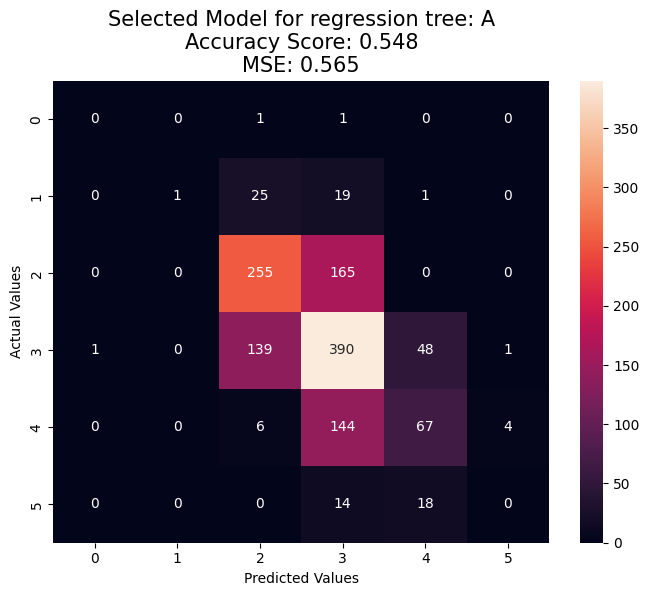

In [ ]:
# Calculate the confusion matrix and accuracy score for selected model
score_regresion_tree = round(accuracy_score(y_test_tree, y_pred_tree), 3)
score_regresion_tree_mse = round(mean_squared_error(y_test_tree, y_pred_tree), 3)
cm = confusion_matrix(y_test_tree, y_pred_tree)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot confusion matrix for the selected model
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Selected Model for regression tree: ' + model_tree + '\nAccuracy Score: {0}'.format(score_regresion_tree) +'\nMSE: {0}'.format(score_regresion_tree_mse), size=15)

# Show the plot
plt.show()

Se observa una leve mejora en el error cuadrático medio y la presición del modelo respecto de la logistic regression

### 1.2.2 Random Forest Regressor

Entrene un bosque aleatorio de regresión manteniendo fijos por defecto los que no se mencionen y variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* max_depth: Probar con las profundidades 2, 20, 200. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

El objetivo de los métodos $\textit{ensemble machine}$ es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje determinado para mejorar la capacidad de generalización / robustez respecto a un único estimador. Se suelen distinguir dos familias de métodos ensemble: los métodos $averaging$ y los métodos $boosting$. Respecto a lo anterior responda las siguientes preguntas:

> a) Defina con sus propias palabras qué son y en qué se diferencian los métodos $averaging$ y $boosting$.

> b) A cual de los dos anteriormente definidos pertenece el modelo de regresión Random Forest?

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

* max_depth: Análogo al caso anterior, tiene la misma interpretación que la ya mencionada. Sin embargo, para enriquecer la respuesta, se podría mencionar que no siempre un max_depth elevado conduce a overfitting, sino que también podría ayudar a capturar relaciones complejas en el conjunto de datos, enriqueciendo la predicción.

* max_samples: Este hiperparámetro se refiere a, específicamente en este caso en que las entradas son del tipo float, las muestras que se dibujan o realizan, es decir, se dibujan max_samples * X.shape[0] muestras (X.shape[0] muestra el número de muestras del dataset). Pero más allá de la documentación de sklearn, modificar este hiperparámetro significa modificar la cantidad de muestras aleatorias que se toman del conjunto de entrenamiento para la construcción de cada árbol. El número ingresado se refiere a la proporción entre muestras aleatorias generadas y el conjunto de datos tota. Un número pequeño genera muestras aleatorias de pequeño tamaño respecto del total y, podría llegar a generar muestras diferentes entre cada selección (especialmente en conjuntos con alta cantidad de outliers como este), por lo que resulta razonable añadirlo como hiperparámetro para enriquecer el modelo y su entrenamiento.

> a) El método $averaging$ se refiere a, como su nombre lo indica, promediar o procesar las predicciones realizadas por estimadores base construidos de manera independiente. Los estimadores pueden ser entrenados con diferentes subconjuntos de datasets y, se espera que el procesamiento conjunto de todas las predicciones ayude a reducir la varianza y mejorar la generalización del modelo. Mientras que el $boosting$ también utiliza diferentes estimadores base, pero construidos secuencialmente. Así los estimadores se van entrenando con énfasis en los ejemplos mal clasificados por el predictor anterior, así se va ajustando un nuevo estimador base para "corregir" los errores anteriores. Se espera construir un modelo que sea capaz de "aprender" de los errores o ejemplos mal clasificados durante en el entrenamiento.

> b) Este modelo (RandomForest) corresponde a un modelo del tipo $averaging$, pues utiliza las predicciones de estimadores generados de manera independiente para luego promediarlas y generar una estimación final (aquí se puede entender la importancia de max_samples).

In [ ]:
cv_folds=KFold(n_splits=5, shuffle=True)

estimator = RandomForestRegressor(max_depth=2, 
                   max_samples=0.1                
                   )

param_grid = {'max_depth': [2 , 20, 200], 
              'max_samples': [0.1, 0.5, 1.0]
              }

hypereg_A = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

hypereg_B = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

rand_tree_regr_A = hypereg_A.fit(A_X_train, A_y_train.ravel())
rand_tree_regr_B = hypereg_B.fit(B_X_train, B_y_train.ravel())
validation_mse_A = -np.max(rand_tree_regr_A.cv_results_['mean_test_score'])
validation_mse_B = -np.max(rand_tree_regr_B.cv_results_['mean_test_score'])
# Get the best model selected from the grid search
model_A_random_tree = rand_tree_regr_A.best_estimator_
model_B_random_tree = rand_tree_regr_B.best_estimator_

# Create a DataFrame to display the selected models and MSE
selected_model_df_random_tree = pd.DataFrame(columns=['Model', 'Best Estimator', 'Validation MSE'])
selected_model_df_random_tree.loc[0] = ['Model A', model_A_random_tree, validation_mse_A]
selected_model_df_random_tree.loc[1] = ['Model B', model_B_random_tree, validation_mse_B]

if validation_mse_A <= validation_mse_B:
    y_pred_tree_rdn = np.round(rand_tree_regr_A.predict(A_X_test))
    y_test_tree_rdn = A_y_test
    model_tree_rdn = 'A'
else:
    y_pred_tree_rdn = np.round(rand_tree_regr_B.predict(B_X_test))
    y_test_tree_rdn = B_y_test
    model_tree_rdn = 'B'

selected_model_df_random_tree.head()

,Model,Best Estimator,Validation MSE
0,Model A,"(DecisionTreeRegressor(max_depth=200, max_feat...",0.400398
1,Model B,"(DecisionTreeRegressor(max_depth=20, max_featu...",0.475746


> c) Se observa que los errores cuadráticos medios sobre el conjunto de validación bajan respecto del caso anterior. Además, el modelo que muestra mejor desempeño sobre el conjunto de validación es el entrenado con el conjunto A

Ahora se muestra el desempeño sobre el conjunto de test:

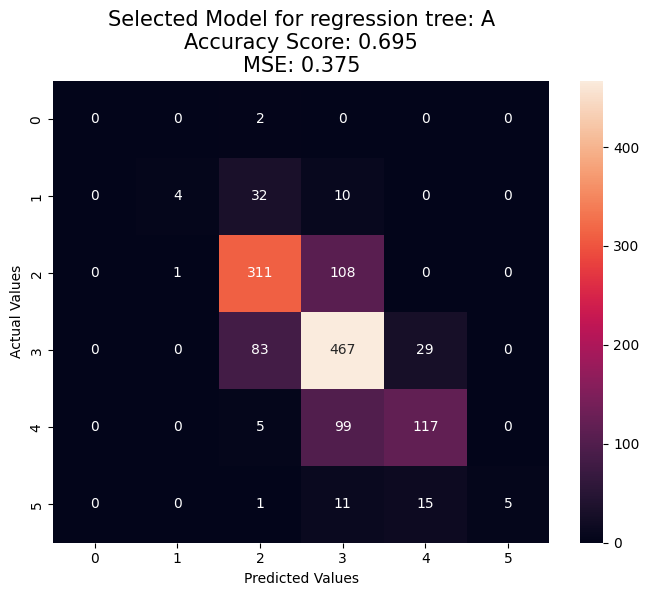

In [ ]:
# Calculate the confusion matrix and accuracy score for selected model
score_regresion_rdn_tree = round(accuracy_score(y_test_tree_rdn, y_pred_tree_rdn), 3)
score_regresion_rdn_tree_mse = round(mean_squared_error(y_test_tree_rdn, y_pred_tree_rdn), 3)
cm = confusion_matrix(y_test_tree_rdn, y_pred_tree_rdn)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot confusion matrix for the selected model
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Selected Model for Random Forest: ' + model_tree_rdn + '\nAccuracy Score: {0}'.format(score_regresion_rdn_tree) +'\nMSE: {0}'.format(score_regresion_rdn_tree_mse), size=15)

# Show the plot
plt.show()

### 1.2.3 Bagging Regressor

Entrene un Bagging regresor utilizando como estimador (parámetro $estimator$) el mejor árbol de decisión obtenido en la pregunta 1.2.1, variando los siguientes parámetros utilizando el módulo gridsearchcv de la librería sklearn:

* n_estimators: Probar con 10, 100, 1000 estimadores. Describa brevemente qué es lo que significa modificar este hiperparámetro.

* max_samples: Probar con las siguientes proporciones 0.1, 0.5, 1.0. Describa brevemente qué es lo que significa modificar este hiperparámetro.

Responda las siguientes preguntas

> a) ¿Cómo funciona el modelo Bagging?

> b) A qué familia de métodos pertenece el Bagging regresor: $averaging$ o $boosting$.

> c) De todas las combinaciones que entrenó, ¿cual es la que mejores resultados le da? Para esta pregunta evalue el modelo con el conjunto de validación utilizando la métrica de evaluación $mean\_squared\_error$.

* n_estimators: Este hiperparámetro controla el número de estimadores base que se utilizarán en el modelo Bagging. Modificar este parámetro implica variar la cantidad de estimadores en el conjunto. Un valor más alto de n_estimators significa que se utilizarán más estimadores (se promediarán más estimaciones), lo que puede aumentar la capacidad del modelo para capturar patrones complejos en los datos. Sin embargo, un valor demasiado alto puede llevar a un aumento en el tiempo de entrenamiento y consumo de recursos.

* max_samples: Análogo al caso anterior del Random Forest

> a) El modelo Bagging (Bootstrap Aggregating) funciona mediante la combinación de múltiples estimadores base (en este caso árboles de regresión), entrenados en subconjuntos aleatorios del dataset de entrenamiento. Cada estimador se entrena de forma independiente en una muestra aleatoria **con reemplazo** del conjunto de entrenamiento original. Luego, las predicciones de cada estimador se promedian (en el caso de regresión, o sea este) o se toma la clase más común (en el caso de clasificación) para obtener una predicción final.

> b) Pertenece a la familia de métodos $averaging$.

In [ ]:
cv_folds=KFold(n_splits=5, shuffle=True)

estimator = BaggingRegressor(estimator=model_for_bagging)

# Create your parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [1, 100, 1000],
    'max_samples': [0.1, 0.5, 1.0],
}

hypereg_A = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             n_jobs=-1, # Enable parallel processing
             verbose=2  
             )

hypereg_B = GridSearchCV(estimator, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             n_jobs=-1, # Enable parallel processing
             verbose=2  
             )


bagging_regr_A = hypereg_A.fit(A_X_train, A_y_train.ravel())
bagging_regr_B = hypereg_B.fit(B_X_train, B_y_train.ravel())

validation_mse_A = -np.max(bagging_regr_A.cv_results_['mean_test_score'])
validation_mse_B = -np.max(bagging_regr_B.cv_results_['mean_test_score'])
# Get the best model selected from the grid search
model_A_bagging = bagging_regr_A.best_estimator_
model_B_bagging = bagging_regr_B.best_estimator_

# Create a DataFrame to display the selected models and MSE
selected_model_df_bagging = pd.DataFrame(columns=['Model', 'Best Estimator', 'Validation MSE'])
selected_model_df_bagging.loc[0] = ['Model A', model_A_bagging, validation_mse_A]
selected_model_df_bagging.loc[1] = ['Model B', model_B_bagging, validation_mse_B]

if validation_mse_A <= validation_mse_B:
    y_pred_bagging = np.round(bagging_regr_A.predict(A_X_test))
    y_test_bagging = A_y_test
    model_bagging = 'A'
else:
    y_pred_bagging = np.round(bagging_regr_B.predict(B_X_test))
    y_test_bagging = B_y_test
    model_bagging = 'B'

selected_model_df_bagging.head()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


,Model,Best Estimator,Validation MSE
0,Model A,"(DecisionTreeRegressor(max_depth=200, max_leaf...",0.490688
1,Model B,"(DecisionTreeRegressor(max_depth=200, max_leaf...",0.559938


> c) Se muestra un peor desempeño que en el caso del modelo entrenado con Random Forest, destacando en el caso de ambos modelos el conjunto A. Sin embargo muestra un claro mejor desempeño que el caso de su estimador base (aunque no muy elevado), tanto en los MSE sobre el conjunto de validación como sobre el conjunto de test.

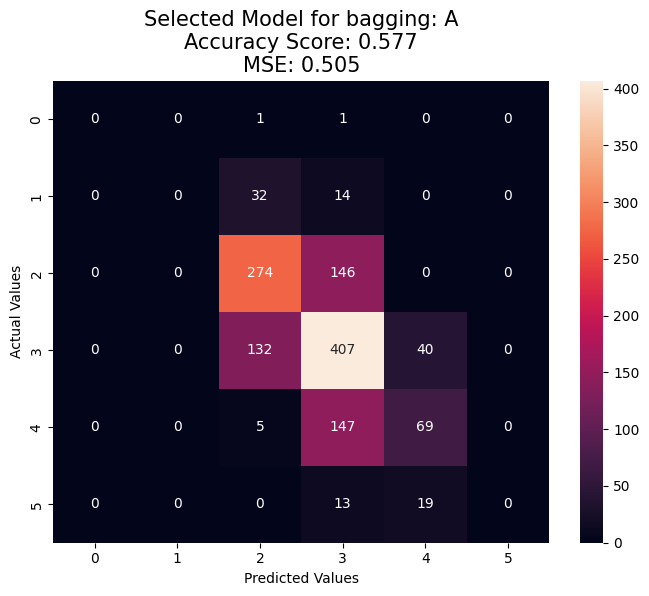

In [ ]:
# Calculate the confusion matrix and accuracy score for selected model
score_regresion_bagging = round(accuracy_score(y_test_bagging, y_pred_bagging), 3)
score_regresion_bagging_mse = round(mean_squared_error(y_test_tree_rdn, y_pred_bagging), 3)
cm = confusion_matrix(y_test_tree_rdn, y_pred_bagging)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot confusion matrix for the selected model
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Selected Model for bagging: ' + model_bagging + '\nAccuracy Score: {0}'.format(score_regresion_bagging) +'\nMSE: {0}'.format(score_regresion_bagging_mse), size=15)

# Show the plot
plt.show()

## 1.3 Conclusiones

Comente con qué modelo y representación obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

> El modelo que obtuvo los mejores resultados fue el Random Forest, destacando un muy bajo MSE (sobre el conjunto de validación, pues no es ideal comparar desempeño sobre el conjunto de test, dado que ese conjunto no altera el entrenamiento del modelo y sólo debe ocuparse para un testeo real sobre un nuevo conjunto de datos. Aunque como se definió más tarde, este métrica sobre el conjunto de test es la que suele usarse para discriminar entre el uso de diferentes modelos) respecto de los otros modelos, llegando a un 0.4 de error aproximadamente. Decidiendo finalmente el mejor estimador como el Random Forest.
> Además, sobre el conjunto de test demostró su buena capacidad de generalización, lo que era esperable respecto de los resultados sobre la validación que fueron obtenidos.
> En cuanto a otros experimentos para intentos de mejora, dada la cantidad de outliers y el desbalance, no sería descabellado probar con modelos del tipo $boosting$, es decir, $AdaBoost$, $Gradient$ $Boosting$, etc. Esto podría mejorar la capacidad de aprendizaje del algoritmo dado el conjunto de datos sobre el que se está trabajando y, así permitir predicciones más ricas en cuanto a la captura de la relación entre los elementos del dataset.

# 2. Reconocimiento de actividad humana mediante sensores de movimiento.

Los conjuntos de datos provienen del UCI Machine Learning Repository. En este conjuntos de datos cada persona realizó seis actividades (CWALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) llevando un smartphone en la cintura. Utilizando su acelerómetro y giroscopio integrados, capturamos la aceleración lineal de 3 ejes y la velocidad angular de 3 ejes a una frecuencia constante de 50 Hz. El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos, de los que se seleccionó el 70% de los voluntarios para generar los datos de entrenamiento y el 30% los datos de prueba.

<center><img src="https://imgtr.ee/images/2023/06/04/bSx54.jpg" alt="bSx54.jpg" border="0" width="480" height="480" /></center>

Para esta pregunta nos centraremos en la tarea de clasificación de actividades (variable objetivo) según los datos de movimiento proporcionados por los sensores (atributos).

Para cada registro en el conjunto de datos nos centraremos en:
* Aceleración triaxial del acelerómetro (aceleración total) y la aceleración estimada del cuerpo.
* Velocidad angular triaxial del giroscopio.

* Su etiqueta de actividad.

Para obtener el dataset, artículos publicados y más información, por favor dirigirse al siguiente [link](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).



## 2.1 Obtención, manipulación y exploración del conjunto de datos

Con el link proporcionado arriba, haga click en Data Folders y luego en *UCI HAR Dataset.names* para obtener una guía acerca de la estructura de los directorios. Descargue, descomprima los datos y explore la estructura de los directorios (*UCI HAR Dataset.zip*).

Para esta oportunidad solo nos centraremos en los dato que se encuentran en las carpetas *Inertial Signals*, para entrenamiento y pruebas.

### 2.1.1 Exploración del conjunto de datos

Una vez comprendida la estructura de los directorios, asegurese de poder navegar por los archivos correctamente:

> a) El código a continuación debe imprimir las rutas a todos los archivos del conjunto de datos que usted acaba de descargar. Ejemplo: /su ruta/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, mean_absolute_error, mutual_info_score, r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor

In [2]:
import os

path_ = os.path.abspath('Enunciado_Tarea_2.ipynb')
data_path_ = os.path.join(os.path.dirname(path_), "preg2\\")

data_path_

for dirname, _, filenames in os.walk(data_path_): 
     for filename in filenames:
         print(os.path.join(dirname, filename))

c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\.DS_Store
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\activity_labels.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\features.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\features_info.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\README.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\test\subject_test.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\test\X_test.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\test\y_test.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\test\Inertial_Signals\body_acc_x_test.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UCI HAR Dataset\test\Inertial_Signals\body_acc_y_test.txt
c:\Users\Lucas\Documents\GitHub\Tarea2_INF398\preg2\UC

In [3]:
LABELS = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
SIGNALS = ["body_acc_x_", "body_acc_y_", "body_acc_z_",
           "body_gyro_x_", "body_gyro_y_", "body_gyro_z_",
           "total_acc_x_", "total_acc_y_", "total_acc_z_"]

> b) Obtenga la ruta exacta de los archivos e insertelos en una lista (entrenamiento y prueba ). El código a continuación es solo una sugerencia, usted puede optimizar y modificarlo.

In [4]:
#path_datatest = os.path.abspath('test')
#path_datatrain = os.path.abspath('train')

path_ = os.path.abspath('Enunciado_Tarea_2.ipynb')
data_path_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\")
data_trainpath_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\")
data_testpath_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\test\\Inertial_Signals\\")

train_paths = [data_trainpath_ + signal + 'train.txt' for signal in SIGNALS]
test_paths = [data_testpath_  + signal + 'test.txt' for signal in SIGNALS]

train_paths
#test_paths

['c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_x_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_y_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_acc_z_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_x_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_y_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\body_gyro_z_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\total_acc_x_train.txt',
 'c:\\Users\\Lucas\\Documents\\GitHub\\Tarea2_INF398\\preg2\\UCI HAR Dataset\\train\\Inertial_Signals\\total_acc_y

> c) Cree una función __load_X que reciba una lista de rutas como alguna de las anteriormente creadas, y retorne un arreglo de numpy con las siguientes dimensiones (n_samples, signal_len, sensor) donde:
* n_samples: es el tamaño de la muestra, o sea, el total de experimentos.
* signal_len: es el largo de la señal de los sensores.
* sensor: es el sensor o el eje del sensor el cual registra la señal, por ejemplo acelerómetro en el eje $y$.


In [5]:

def __load_X(X_signal_paths):
    n_samples = len(X_signal_paths) #cantidad de muestras 
    X_signals = []  
    for x in X_signal_paths:
        data = np.loadtxt(x)
        X_signals.append(data)

    return np.transpose(np.array(X_signals), (1, 2, 0))


In [6]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)

In [7]:
print ('train dimension : ', np.shape(x_train))
print('test dimension : ', np.shape(x_test))

train dimension :  (7352, 128, 9)
test dimension :  (2947, 128, 9)


> d) Cargue las clases del conjunto de entrenamiento y pruebas en arreglos numpy.

In [8]:
trn_pth_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\train\\y_train.txt")
tst_pth_= os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\test\\y_test.txt")
y_train = np.loadtxt(trn_pth_,  dtype=np.int32)
y_test = np.loadtxt(tst_pth_, dtype=np.int32)



In [66]:
y_test
y_train

array([5, 5, 5, ..., 2, 2, 2])

### 2.1.2 Análisis del conjunto de datos

Responda las siguientes preguntas:

> a) ¿Cuántos experimentos le quedan en el conjunto de entrenamiento y en el de test?

    Considerando como experimentos a todos los ejemplos de entrenamiento con que se disponen de la base de datos, se puede apreciar que finalmente se tienen 7352 experimentos que contienen mediciones obtenidas a partir de los 9 sensores disponibles.
    Por otro lado para el conjunto de test se tienen 2947 experimentos.

> b) ¿Qué valores obtiene para las dimensiones recién definidas (n_samples, signal_len, sensor)?

    Para el _train set_ se obtienen dimensiones de 7352, 128 y 9 respectivamente. Esto tiene sentido, pues para cada sensor (9 en total) se realizan 7352 muestras, las cuales tienen 128 puntos de medición de aceleración.
    Para el _test set_ se obtienen dimensiones de 2947, 128 y 9 respectivamente.

> c) Considerando todo lo que usted ha aprendido en este curso y en las tareas anteriores, ¿Qué puede decir de los atributos de este conjunto de datos?. Obtenga estadísticas descriptivas y sintetice brevemente con sus propias palabras lo que observe, apoyándose de gráficos como histográmas, boxplots heatmaps de correlación, etc.

    Respondida a continuación con apoyo de gráficos.


> d) Si quisiera entrenar una red neuronal feedforward con este conjunto de datos, ¿cómo deben representarse las dimensiones de cada experimento (sample) para que sirvan de entrada para este tipo de red?

    Si se desea entrenar una red neuronal feedforward, se debe reducir las dimensiones de los datos para que solo queden de una dimensión. De esta forma si se elimina la dimensión asociada al sensor, al reducir la dimensionalidad corresponderá a un conjunto de datos con dimensiones (7352, 1152) que representarán 7352 muestras y cada muestra de un tamaño de 1152 datos.
    
    
> e) Modifique las dimensiones de los atributos para luego entrenar una red neuronal feedforward.

    c) Para poder hacer aseveraciones respecto de los atributos del conjunto de datos primero es necesario realizar un análisis exploratorio de los features en el conjunto de entrenamiento. Para esto, a continuación se presentan histogramas para las mediciones obtenidas por cada uno de los sensores.


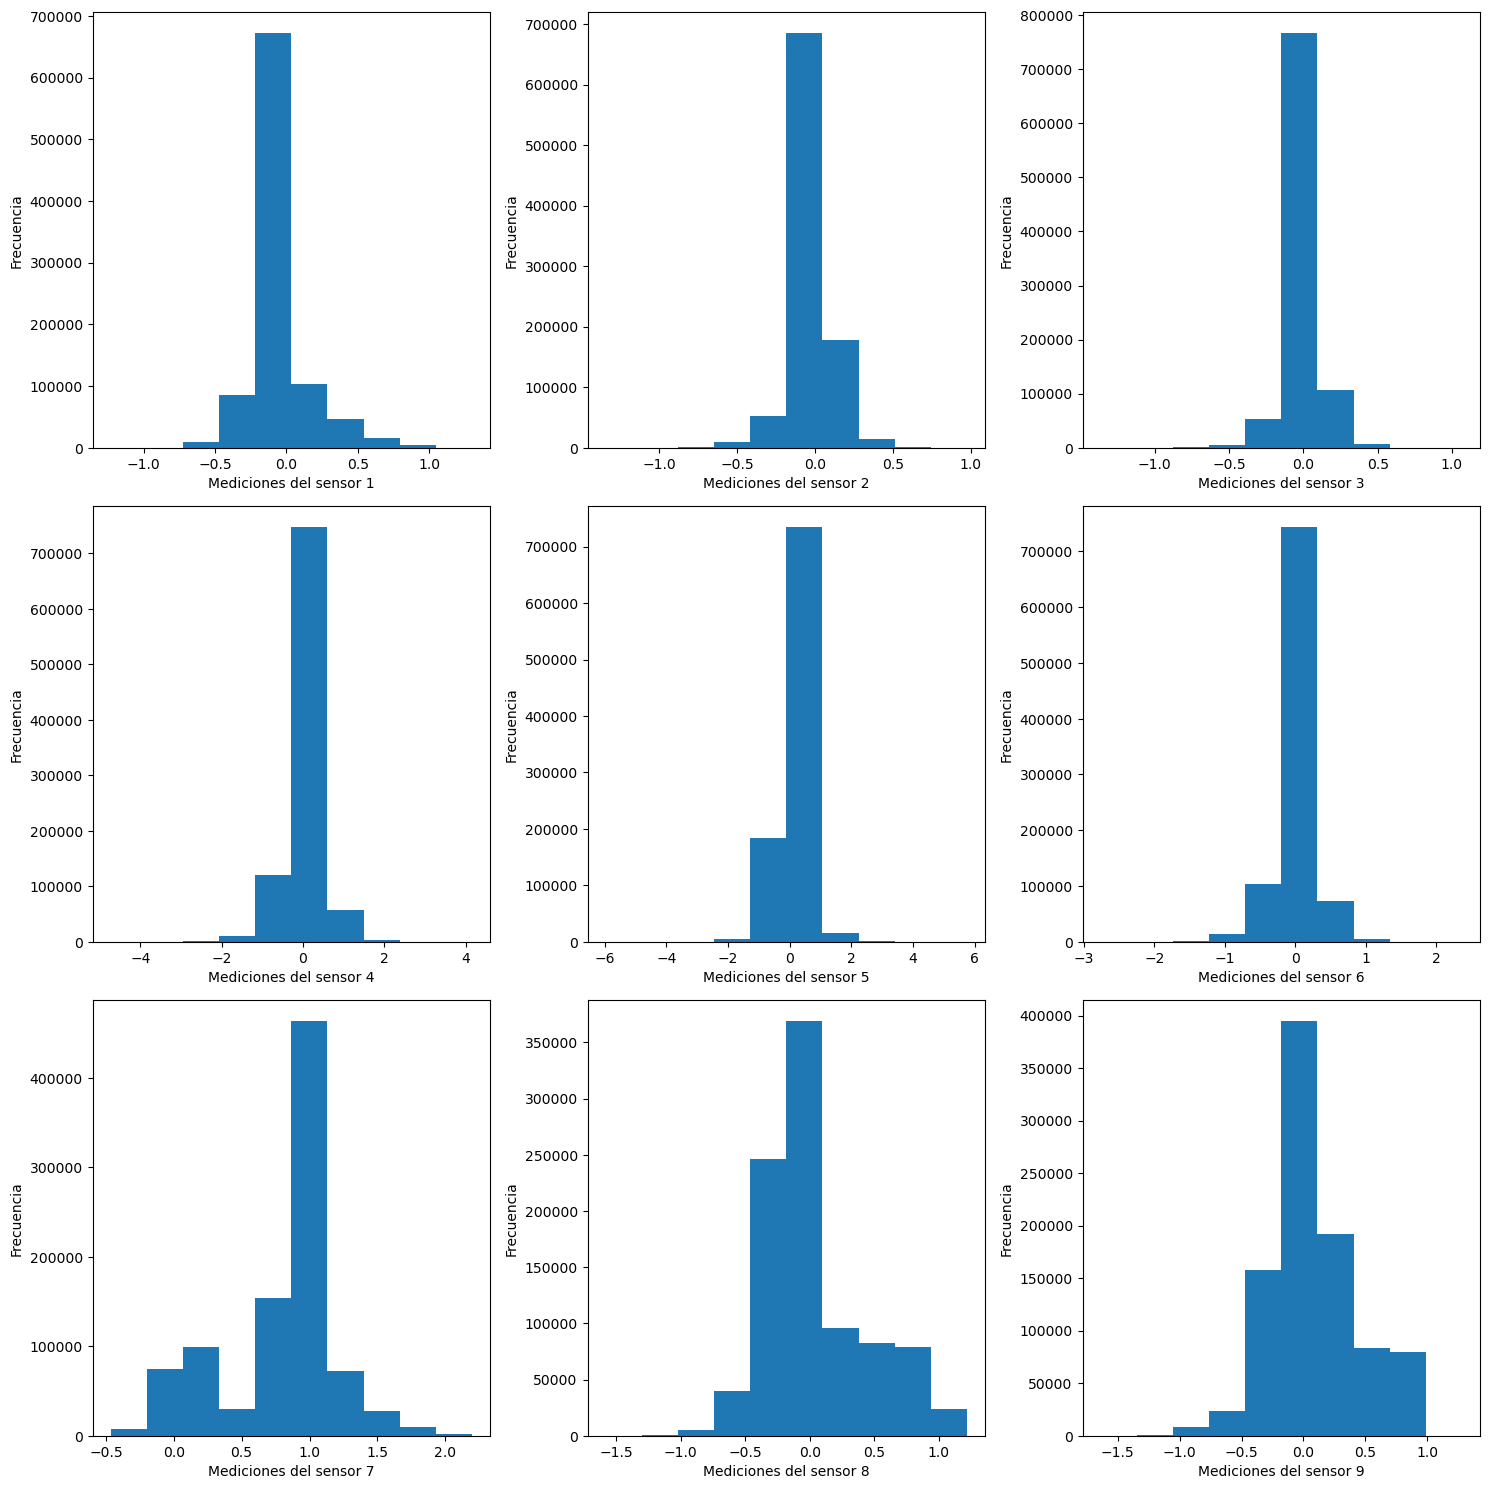

In [9]:
#ESTO ES EN CASO QUE CONSIDEREMOS LAS 128 MEDICIONES DE CADA SENSOR
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(x_train.shape[2]):
    sensor_measurements = x_train[:, :, i]
    flattened_measurements = sensor_measurements.flatten()

    row = i // 3
    col = i % 3
    
    axs[row, col].hist(flattened_measurements, bins=10)  # Ajusta el número de bins según tus necesidades
    axs[row, col].set_xlabel('Mediciones del sensor {}'.format(i+1))
    axs[row, col].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

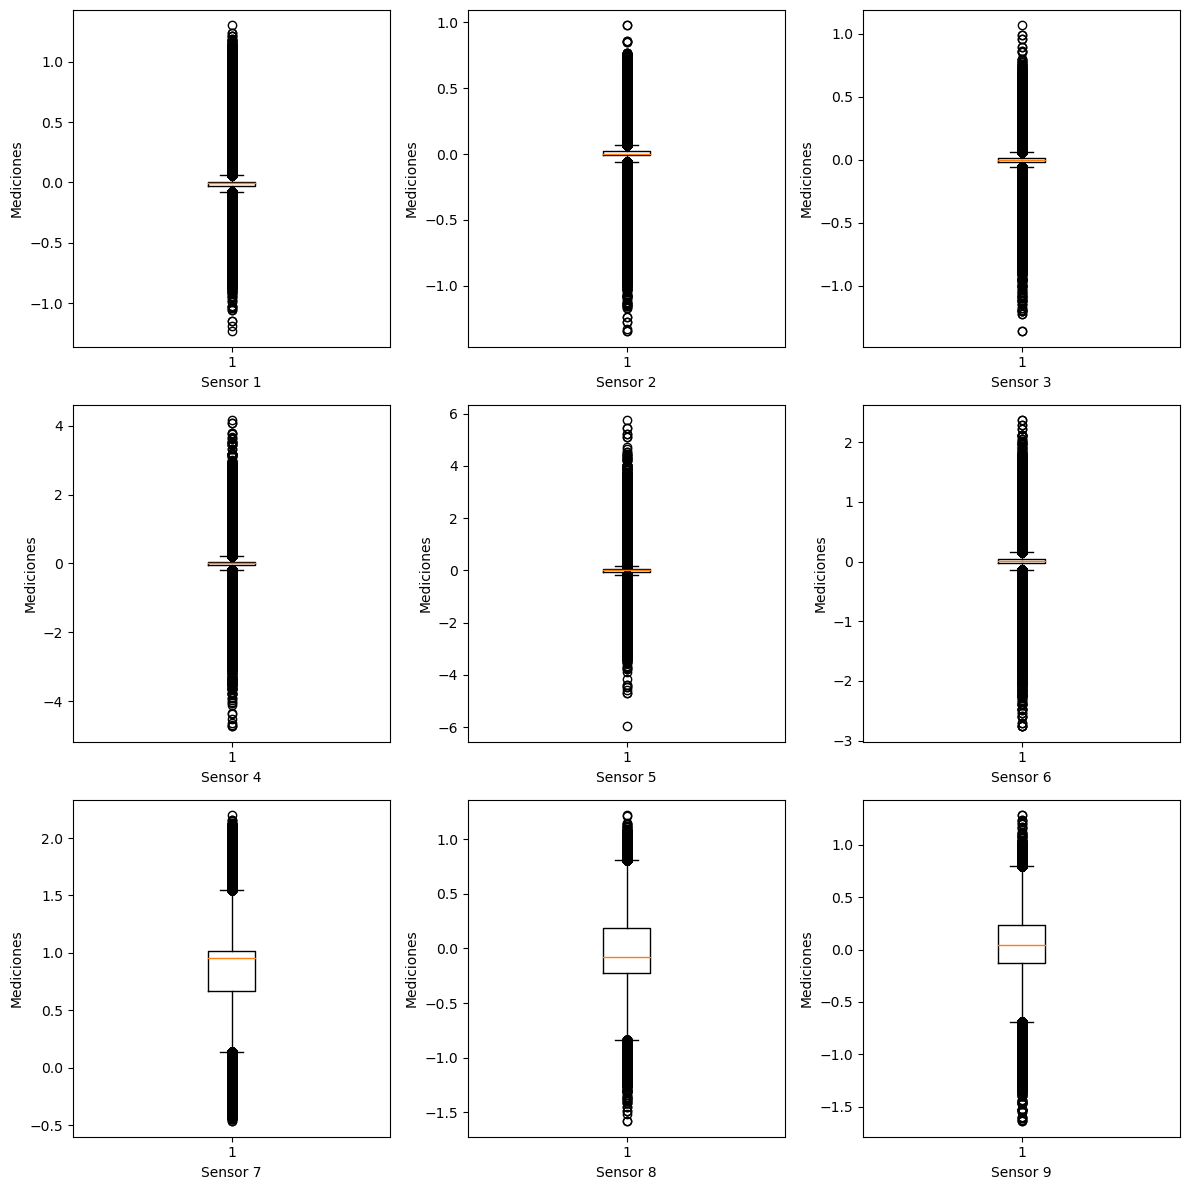

In [10]:
#ESTO ES EN CASO QUE CONSIDEREMOS LAS 128 MEDICIONES DE CADA SENSOR
sensor_data = []

for i in range(9):
    sensor_i_data = x_train[:, :, i]
    flattened_data = sensor_i_data.flatten()
    sensor_data.append(flattened_data)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i in range(9):
    row = i // 3  
    col = i % 3   
    
    ax[row, col].boxplot(sensor_data[i])
    ax[row, col].set_xlabel('Sensor {}'.format(i+1))
    ax[row, col].set_ylabel('Mediciones')

plt.tight_layout()
plt.show()

Al analizar los atributos del conjunto de datos proporcionado para esta sección, se observa que cada atributo tiene una distribución diferente según los histogramas, lo cual sugiere que los _features_ tienen características únicas y pueden contribuir de manera distinta a la tarea de aprendizaje automático.

Además, al examinar los boxplots, se evidencia la presencia de una gran cantidad de valores atípicos (outliers) en los datos, lo cual se puede deber en primer lugar a errores o situaciones inusual, o también en algunos casos a la naturaleza de las mediciones de cada sensor, ya que debido a que registra diferentes "actividades", los valores que pide el sensor pueden ser diametralmente opuestos. Razón por la cual, si una de las actividades está presente en mayor proporcion puede forzar a que las mediciones de otras actividades sean considerados como outliers.

In [11]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))
np.shape(x_train) #Elimino indice de archivo

(7352, 1152)

> f) ¿Cómo quedó cada atributo ahora que modificó sus dimensiones?

        Se corrobora la reducción de dimensionalidad mencionada anteriormente.
        

### 2.1.3 Procesamiento del conjunto de datos

> a)Transforme las clases a One Hot Encoder

In [12]:
onehot_encoder = OneHotEncoder(sparse_output=False)

y_train_OHE = onehot_encoder.fit_transform(y_train.reshape(len(y_train), 1))
y_test_OHE = onehot_encoder.transform(y_test.reshape(len(y_test), 1))

# Print the original labels and the one-hot encoded labels
print("Original Labels:")
print(y_train.shape)
print("\nOne-Hot Encoded Labels:")
print(y_train_OHE.shape)

Original Labels:
(7352,)

One-Hot Encoded Labels:
(7352, 6)


In [13]:
LABELS[np.argmax(y_train_OHE[400])]

'SITTING'

> b) ¿Estan bien balanceadas las clases?

        Para corroborar si las clases estan bien balanceadas, se grafica tanto el conjunto de entrenamiento como de test para verificar distribuciones

C:\Users\Lucas\AppData\Local\Temp\ipykernel_17348\2603581859.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(LABELS, rotation=45)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_17348\2603581859.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(LABELS, rotation=45)


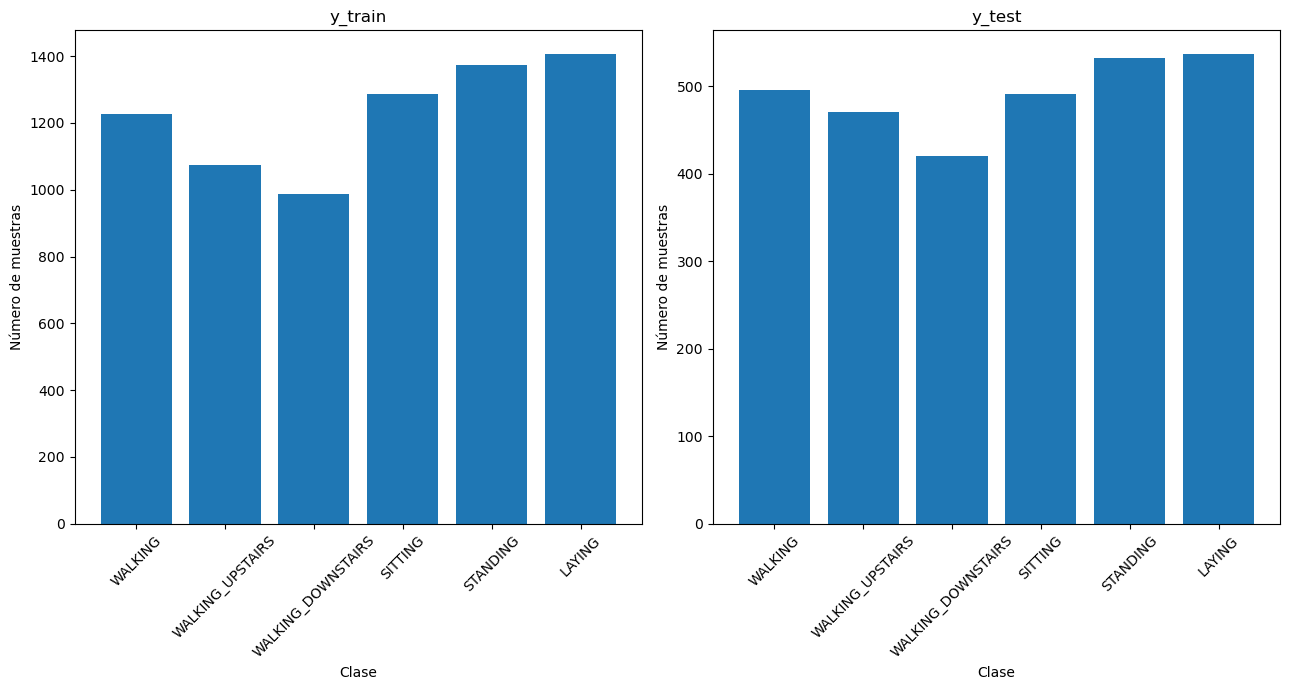

In [14]:
# grafica que cuente cuantos 1 hay en cada columna de y_train_OHE


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

ax1.bar(LABELS, y_train_OHE.sum(axis=0))
ax1.set_title("y_train")
ax1.set_xlabel("Clase")
ax1.set_ylabel("Número de muestras")
ax1.set_xticklabels(LABELS, rotation=45)

ax2.bar(LABELS, y_test_OHE.sum(axis=0))
ax2.set_title("y_test")
ax2.set_xlabel("Clase")
ax2.set_ylabel("Número de muestras")
#ax2.set_xticks(np.arange(0, 2000, 500))
ax2.set_xticklabels(LABELS, rotation=45)

plt.tight_layout()

plt.show()


    Al graficar las clases se puede observar que tanto para el conjunto de entrenamiento y test los target estan bien balanceados.

> c) Estandarice los atributos con media 0 y variaza 1.

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## 2.2 Modelos de clasificación

### 2.2.1 Redes Neuronales

> a) ¿Cómo se entrena una red neuronal feedforward?

    La red neuronal feedforward se entrena a partir de dos conceptos principales: forward propagation y backpropagation.
    
    Forward propagation consiste en ingresar los datos de entrada del conjunto de entrenamiento a la red para obtener los datos de salida y con ello utilizar métricas de error tal como la función de péridda o el MSE (comparando con los target reales del training set).

    A partir de los errores obtenidos, se realiza brackpropagation que consiste en propagar el error desde la output layer hasta la input layer secuencialmente, para esto se utiliza la derivada de la métrica del error respecto a los pesos existente entre las neuronas de las distintas capas de la red.

    Luego a partir del error propagado desde la output layer hasta la input layer se actualizan los pesos a partir de las derivadas calculadas anteriormente


> b) ¿Qué es una neurona en este contexto?

    En el contexto del Machine Learning y las redes neuronales, una neurona es una entidad matemática que toma entradas, las pondera mediante pesos y aplica una función de activación para generar una salida. Las salidas de las neuronas pueden ser utilizadas como entradas para otras neuronas en la red, formando así las llamadas Redes neuronales.



> c) ¿Qué es una función de activación y para que sirven?

    La función de activación es una función no lineal que se aplica a la combinación lineal de las entradas de una neurona. Se utiliza con al finalidad de modelar de una forma no lineal el comportamiento de los datos de entrada y así, complejizar el modelo de redes neuronales. Las tres funciones de activación principales corresponden a la función sigmoide, la función Relu y la función tanh (tangente hiperbólica).

> d) ¿A qué se le llama capa densa?

    Una capa densa es una capa en la que todas sus neuronas están conectadas con todas las neuronas de la capa anterior y posterior. Es decir, cada neurona tiene una conexión con todas las neurona de las capas adyacentes. 

    Con ello, cada neurona de la capa densa recibe como entrada todas las neuronas de la capa anterior. Así como cada neurona de la capa posterior recibirá como entrada la combinación lineal de todas las neuronas de la capa densa (más la función de activación).


> e) Si usted conoce la dimensión entrada, la de salida, la cantidad de capas y neuronas de cada capa, ¿cómo se calcula la cantidad de pesos de la red?

Si consideramos "r" neuronas en la capa de entrada, "I" capas ocultas con "$n_i$" neuronas cada una y "o" neuronas en la capa de salida, la cantidad de pesos en la red estaría dada por:

\begin{equation}
    (r+1)\cdot n_1 + \sum_{i=1}^{I}\left((n_i+1)\cdot n_{i+1}\right) + (n_{I}+1)\cdot o
\end{equation}

Siendo importante señalar que a los términos $r$ y $n_i$ se les suma uno para considerar el bias.

> f) ¿A qué se refiere el fenómeno de gradiente desvaneciente?, ¿y el gradiente explosivo?

El fenómeno de gradiente desvaneciente hace referencia a un problema que se puede dar en el entrenamiento de redes neuronales profundas, donde los gradientes de error se vuelven cada vez más pequeños a medida que se propagan hacia las capas anteriores (backpropagation), provocándose principalmente con aquellas funciones de activación que tienen gradientes (o derivadas) cercanas a 0 (como es el caso de la función sigmoide). Este fenpómeno genera como que las primeras capas reciban gradientes muy pequeños y sus pesos no se actualizan de manera efectiva, lo que puede llevar a un mal proceso de aprendizaje.

Por otro lado el gradiente explosivo es el fenómeno contrario al gradiente desvaneciente, donde los gradientes de error se vuelven demasiado grandes a medida que se propagan hacia las capas anteriores. Esto puede ocurrir cuando se utilizan funciones de activación que amplifican el gradiente, como la función ReLU, y/o cuando los pesos de la red tienen valores grandes. Un gradiente explosivo puede causar inestabilidades numéricas durante el entrenamiento y dificultar la convergencia del modelo.

> g) Para esta tarea, como debería ser la capa de salida de la red considerando que previemente aplicó una transformación One Hot Encoding a las clases del conjunto?

    La output layer debería contar con seis neuronas, una para cada posible valor del target. De esta forma, cada neurona deberá indicar si se está realizando dicha actividad o no.


> h) Considere que la capa de entrada se llama "input_layer",  a la capa de salida le llamaremos "output_layer" y a las capas intermedias "hidden_layer(_units_, _activation_)" donde los parametros significan el numero de neuronas que tiene esa capa densa (Dense en Keras) y su activación. Cree las siguientes redes neuronales:

* input_layer -> output_layer

* input_layer -> hidden_layer(32, tanh) -> output_layer

* input_layer -> hidden_layer(32, sigmoid) -> output_layer

* input_layer -> hidden_layer(32, relu) -> output_layer

> i) Una vez creado el modelo, imprima el sumario (modelo.summary()) y compare los resultados obtenidos con su razonamiento explicado en la pregunta e).

In [16]:
#Importando librerías para el modelo


from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Model
from keras.activations import tanh, sigmoid, relu, softmax
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy, accuracy
from keras.callbacks import EarlyStopping


In [17]:
input_layer = Input(shape = (x_train.shape[1:])) #Defino input layer

# Modelo solo con input y output layer.

output_layer = Dense(units=6, activation=softmax)(input_layer) # Output layer. Función de activación softmax para clasificación multiclase

ANN_1 = Model(inputs = input_layer , outputs = output_layer) # Modelo solo con input y output layer

# Segundo modelo, input layer, hidden layer (32, tanh) y output layer

layer_2 = Dense(units=32, activation=tanh)(input_layer)
output_layer_2 = Dense(units=6, activation=softmax)(layer_2) # Output layer. Función de activación softmax para clasificación multiclase
ANN_2 = Model(inputs = input_layer , outputs = output_layer_2) # Modelo solo con input, 1 hidden layer y output layer

# Tercer modelo, con input layer, hidden_layyer(32,sigmoid) y output layer
layer_3 = Dense(units=32, activation=sigmoid)(input_layer)
output_layer_3 = Dense(units=6, activation=softmax)(layer_3) # Output layer. Función de activación softmax para clasificación multiclase
ANN_3 = Model(inputs = input_layer , outputs = output_layer_3) # Modelo solo con input, 1 hidden layer y output layer

# Cuarto modelo, con input layer, hidden_layer(32,relu) y output layer
layer_4 = Dense(units=32, activation=relu)(input_layer)
output_layer_4 = Dense(units=6, activation=softmax)(layer_4) # Output layer. Función de activación softmax para clasificación multiclase
ANN_4 = Model(inputs = input_layer , outputs = output_layer_4) # Modelo solo con input, 1 hidden layer y output layer



In [ ]:
#printeo summary de los modelos
print(' ')
print('Modelo con solo input y output layer')
print('')
ANN_1.summary()
print(' ')
print('Modelo con input layer, hidden layer (32, tanh) y output layer')
print(' ')
ANN_2.summary()

print(' ')
print('Modelo con input layer, hidden layer (32, sigmoid) y output layer')
print(' ')
ANN_3.summary()

print(' ')
print('Modelo con input layer, hidden layer (32, relu) y output layer')
print(' ')
ANN_4.summary()

 
Modelo con solo input y output layer

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense (Dense)               (None, 6)                 6918      
                                                                 
Total params: 6,918
Trainable params: 6,918
Non-trainable params: 0
_________________________________________________________________
 
Modelo con input layer, hidden layer (32, tanh) y output layer
 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                36896     
 

 > j) Defina un callback de Early Stopping para evitar un sobre ajuste de la red basandose en sus respuestas a las siguientes preguntas:

* ¿Qué es lo que se debería monitorear para evitar el sobre ajuste en esta red?

        Dado a que se trata de un problema de clasificación multi clases la idea sería monitorear alguna métrica de error para evitar el sobreajuste. Dentro de las métricas que se deban monitorear una de ellas es el accuracy

* ¿Qué es la paciencia en este contexto?

        La paciencia en este contexto establece cuantos epochs sin mejorar el modelo se esperan antes de que se detenga el entrenamiento. Con mejorar se refiere a cuando no disminuye la métrica de error utilizada para monitorear el desempeño de la red neuronal 

* ¿Para qué se usa el parámetro min_delta?

        El parámetro min_delta corresponde a el menor cambio en la métrica de error utilizada tal que esta cuente como una mejora en el modelo de red neuronal al entrenarla. Si la disminución de la métrica de error es mayor a min_delta, se interpreta como una mejora, y viceversa, si es menor a min_delta, entonces el modelo no mejora y con ello se tiene un _epoch_ sin mejora en el modelo para el argumento de paciencia.
    

> k) Compile el modelo usando como optimizador el gradiente descendente estocástico, utilice la métrica "categorical_accuracy" y responda lo siguiente:

* ¿Qúe función de pérdida se debe usar para este problema (loss)?

        Como se trata de un problema de clasificación multi clases se debe como función de pérdida la entropía cruzada (cross entropy), ya que, esta función mide la diferencia entre la distribución de probabilidad del target y de las predichas por la red.

**Nota:** Si bien en un mundo ideal donde hay tiempo y recursos para explorar un subconjunto del espacio de hipótesis lo suficientemente amplio como para cubrir todas las posibles combinaciones de hiperparámetros, en esta tarea solo se explorarán algunos.

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_categorical_accuracy',mode='max', verbose=1, patience=15) #Defino early_stop por el accuracy


ANN_1.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy]) 

ANN_2.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy])

ANN_3.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy])

ANN_4.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy])

> l) Entrene el modelo utilizando el callback definido en la pregunta anterior con 100 epochs,un batch_size=256, y validation split=0.1.

* ¿Qué significa el batch_size?

        El batch_size corresponderá al número de muestras que se utilizarán del conjunto de entrenamiento para actualizar los pesos de la red neuronal.

**Nota:** Por favor recuerde ocultar el output del entrenamiento!! Mantenga el orden de su tarea y justifique de forma óptima sus resultados.

In [19]:
%%capture

history_1 = ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop]) # Entrenamiento del modelo 1 con early_stop

history_2 = ANN_2.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 2 con early_stop

history_3 = ANN_3.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 3 con early_stop

history_4 = ANN_4.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 4 con early_stop

In [20]:
history_1.history.keys() # Veo las keys del history del modelo 1

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [21]:
print('val_acurracy modelo 1 :', history_1.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 1
print('val_acurracy modelo 2 :', history_2.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 2
print('val_acurracy modelo 3 :', history_3.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 3
print('val_acurracy modelo 4 :', history_4.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 4


val_acurracy modelo 1 : 0.5692934989929199
val_acurracy modelo 2 : 0.82472825050354
val_acurracy modelo 3 : 0.7472826242446899
val_acurracy modelo 4 : 0.8913043737411499


In [22]:
print('train_acurracy modelo 1 :', history_1.history['categorical_accuracy'][-1]) # Accuracy del modelo 1
print('train_acurracy modelo 2 :', history_2.history['categorical_accuracy'][-1]) # Accuracy del modelo 2
print('train_acurracy modelo 3 :', history_3.history['categorical_accuracy'][-1]) # Accuracy del modelo 3
print('train_acurracy modelo 4 :', history_4.history['categorical_accuracy'][-1]) # Accuracy del modelo 4


train_acurracy modelo 1 : 0.6556832194328308
train_acurracy modelo 2 : 0.9464933276176453
train_acurracy modelo 3 : 0.84461909532547
train_acurracy modelo 4 : 0.9610036015510559


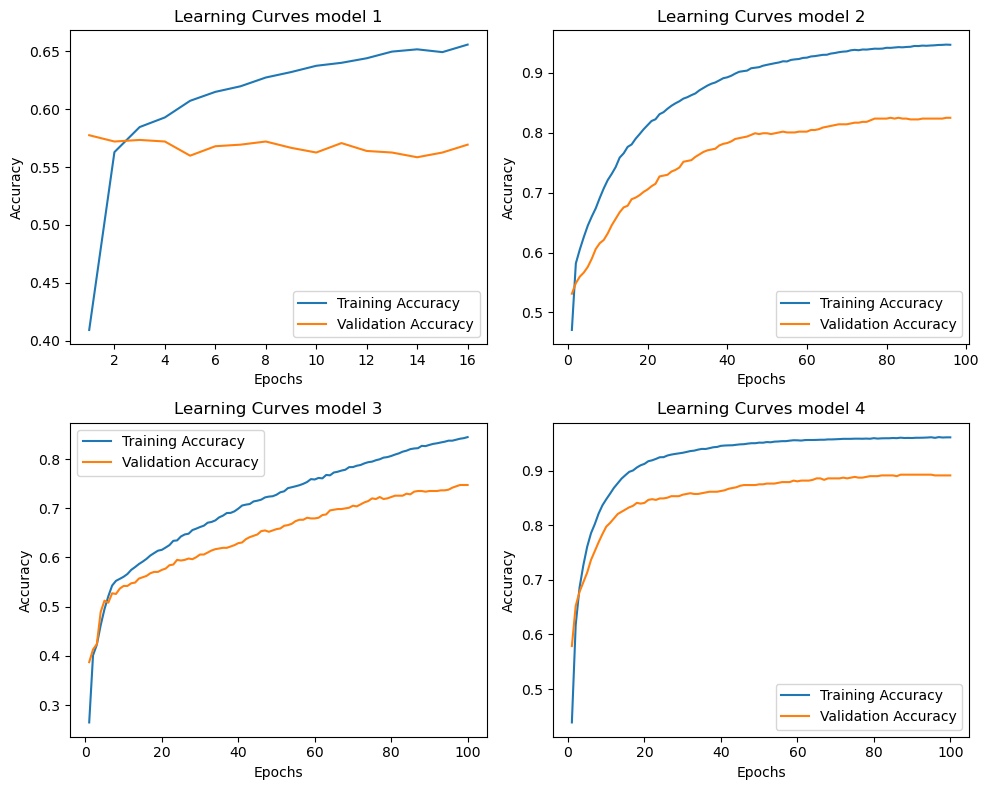

In [23]:
import matplotlib.pyplot as plt

# Access the training and validation errors from the history object
train_errors_1 = history_1.history['categorical_accuracy']
val_errors_1 = history_1.history['val_categorical_accuracy']
train_errors_2 = history_2.history['categorical_accuracy']
val_errors_2 = history_2.history['val_categorical_accuracy']
train_errors_3 = history_3.history['categorical_accuracy']
val_errors_3 = history_3.history['val_categorical_accuracy']
train_errors_4 = history_4.history['categorical_accuracy']
val_errors_4 = history_4.history['val_categorical_accuracy']




# Get the number of epochs
epochs_1 = range(1, len(train_errors_1) + 1)
epochs_2 = range(1, len(train_errors_2) + 1)
epochs_3 = range(1, len(train_errors_3) + 1)
epochs_4 = range(1, len(train_errors_4) + 1)

# Plotting the learning curves


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))


## MODELO 1 
ax1.plot(epochs_1, train_errors_1, label='Training Accuracy')
ax1.plot(epochs_1, val_errors_1, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Learning Curves model 1')
ax1.legend()

## MODELO 2
ax2.plot(epochs_2, train_errors_2, label='Training Accuracy')
ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Learning Curves model 2')
ax2.legend()

## MODELO 3
ax3.plot(epochs_3, train_errors_3, label='Training Accuracy')
ax3.plot(epochs_3, val_errors_3, label='Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.set_title('Learning Curves model 3')
ax3.legend()

## MODELO 4
ax4.plot(epochs_4, train_errors_4, label='Training Accuracy')
ax4.plot(epochs_4, val_errors_4, label='Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')
ax4.set_title('Learning Curves model 4')
ax4.legend()

# Adding labels and title
plt.tight_layout()

# Displaying the plot
plt.show()

    Se observa que el modelo con la función ReLu de activación es la que mejor accuracy tiene en el conjunto de validación y en el conjunto de entrenamiento. Por lo que esta será la función de activación a utilizar para los modelos posteriores

> m) Escoja el mejor modelo según la función de activación y puntuación obtenida en el conjunto de validación y pruebe con los siguientes modelos:

* input_layer -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

* input_layer -> hidden_layer(256, best_activ) -> hidden_layer(128, best_activ) -> hidden_layer(64, best_activ) -> hidden_layer(32, best_activ) -> output_layer

In [24]:
input_layer = Input(shape = (x_train.shape[1:])) #Defino input layer
new_layer_1 = Dense(units=64, activation=relu)(input_layer)
new_layer_12 = Dense(units=32, activation=relu)(new_layer_1)
new_output_layer1 = Dense(units=6, activation=softmax)(new_layer_12) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_1 = Model(inputs = input_layer , outputs = new_output_layer1) # Modelo solo con input, 1 hidden layer y output layer

new2_layer = Dense(units=128, activation=relu)(input_layer)
new2_layer_2 = Dense(units=64, activation=relu)(new2_layer)
new2_layer_3 = Dense(units=32, activation=relu)(new2_layer_2)
new2_output_layer = Dense(units=6, activation=softmax)(new2_layer_3) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_2 = Model(inputs = input_layer , outputs = new2_output_layer) # Modelo solo con input, 1 hidden layer y output layer

new3_layer = Dense(units=256, activation=relu)(input_layer)
new3_layer_2 = Dense(units=128, activation=relu)(new3_layer)
new3_layer_3 = Dense(units=64, activation=relu)(new3_layer_2)
new3_layer_4 = Dense(units=32, activation=relu)(new3_layer_3)
new3_output_layer = Dense(units=6, activation=softmax)(new3_layer_4) # Output layer. Función de activación softmax para clasificación multiclase

new_ANN_3 = Model(inputs = input_layer , outputs = new3_output_layer) # Modelo solo con input, 1 hidden layer y output layer


In [ ]:
print(' ')
print('Modelo con solo input y output layer')
print('')
new_ANN_1.summary()
print(' ')
print(' ')
print(' ')
print('Modelo con input layer, hidden layer (32, tanh) y output layer')
print(' ')
print(' ')
print(' ')

new_ANN_2.summary()
print(' ')
print(' ')
print(' ')
print('Modelo con input layer, hidden layer (32, sigmoid) y output layer')
print(' ')
new_ANN_3.summary()

 
Modelo con solo input y output layer

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1152)]            0         
                                                                 
 dense_19 (Dense)            (None, 64)                73792     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 6)                 198       
                                                                 
Total params: 76,070
Trainable params: 76,070
Non-trainable params: 0
_________________________________________________________________
 
 
 
Modelo con input layer, hidden layer (32, tanh) y output layer
 
 
 
Model: "model_8"
_______________________________________________________

In [25]:
%%capture

new_ANN_1.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy])

new_ANN_2.compile(optimizer=SGD() , loss=categorical_crossentropy , metrics=[categorical_accuracy])

new_ANN_3.compile(optimizer=SGD() , loss=categorical_crossentropy ,metrics=[categorical_accuracy])

new_history_1 = new_ANN_1.fit(x_train, y_train_OHE, 
                  batch_size=256, 
                  epochs=100,
                  validation_split=0.1,
                  callbacks=[early_stop]) # Entrenamiento del modelo 1 con early_stop

new_history_2 = new_ANN_2.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 2 con early_stop

new_history_3 = new_ANN_3.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stop]) # Entrenamiento del modelo 3 con early_stop

In [27]:
new_history_1.history.keys() # Veo las keys del history del modelo 1

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [26]:
print('val_acurracy nuevo modelo 1 :', new_history_1.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 1
print('val_acurracy nuevo modelo 2 :', new_history_2.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 2
print('val_acurracy nuevo modelo 3 :', new_history_3.history['val_categorical_accuracy'][-1]) # Accuracy del modelo 3


val_acurracy nuevo modelo 1 : 0.89673912525177
val_acurracy nuevo modelo 2 : 0.907608687877655
val_acurracy nuevo modelo 3 : 0.91576087474823


    El mejor modelo resultante es el que contiene tres hidden layers.

>n) Imprima las curvas de error y accuracy del conjunto de entrenamiento y de validación para observar como se comporta el _aprendizaje_ de sus modelos.

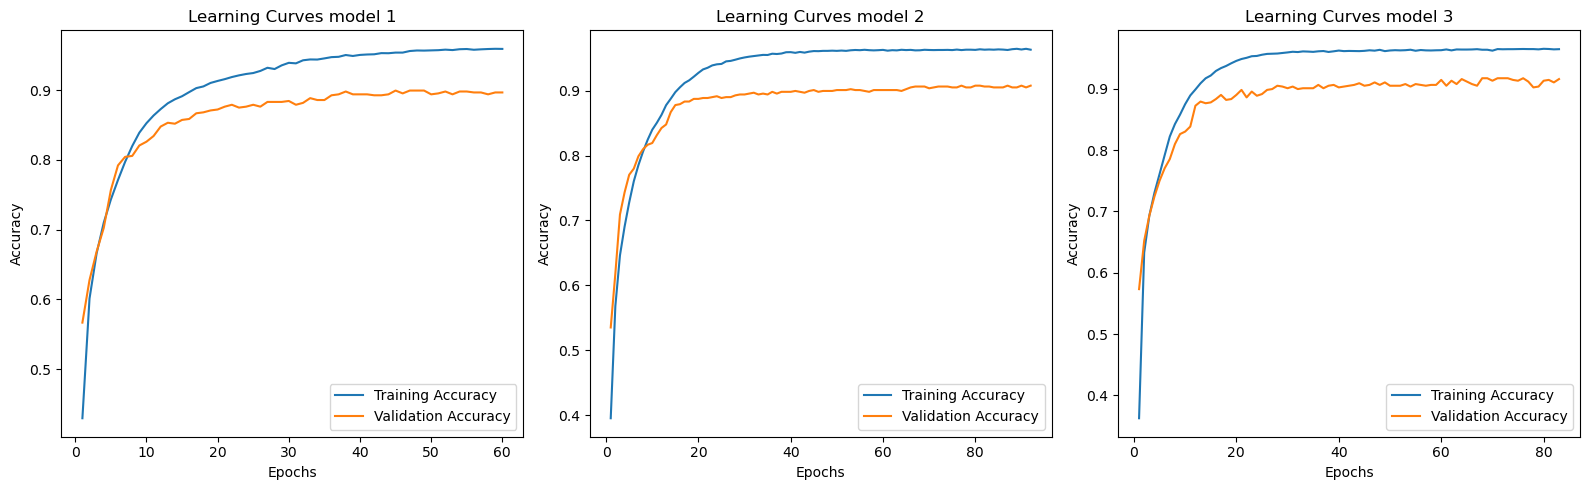

In [28]:
# Access the training and validation errors from the history object
train_errors_1 = new_history_1.history['categorical_accuracy']
val_errors_1 = new_history_1.history['val_categorical_accuracy']
train_errors_2 = new_history_2.history['categorical_accuracy']
val_errors_2 = new_history_2.history['val_categorical_accuracy']
train_errors_3 = new_history_3.history['categorical_accuracy']
val_errors_3 = new_history_3.history['val_categorical_accuracy']



# Get the number of epochs
epochs_1 = range(1, len(train_errors_1) + 1)
epochs_2 = range(1, len(train_errors_2) + 1)
epochs_3 = range(1, len(train_errors_3) + 1)

# Plotting the learning curves
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))


# Model 1
ax1.plot(epochs_1, train_errors_1, label='Training Accuracy')
ax1.plot(epochs_1, val_errors_1, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Learning Curves model 1')
ax1.legend()

# Model 2
ax2.plot(epochs_2, train_errors_2, label='Training Accuracy')
ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Learning Curves model 2')
ax2.legend()

# Model 3
ax3.plot(epochs_3, train_errors_3, label='Training Accuracy')
ax3.plot(epochs_3, val_errors_3, label='Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.set_title('Learning Curves model 3')
ax3.legend()


plt.tight_layout()
# Displaying the plot
plt.show()

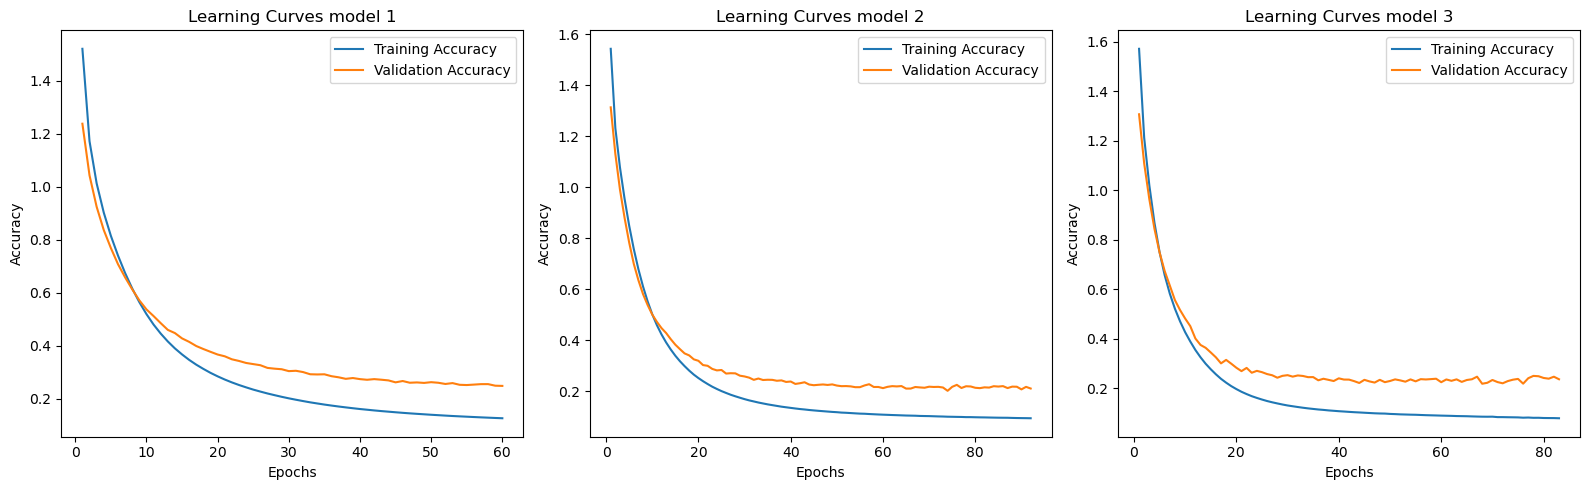

In [30]:
# Access the training and validation errors from the history object
train_errors_1 = new_history_1.history['loss']
val_errors_1 =  new_history_1.history['val_loss']
train_errors_2 =  new_history_2.history['loss']
val_errors_2 = new_history_2.history['val_loss']
train_errors_3 =  new_history_3.history['loss']
val_errors_3 = new_history_3.history['val_loss']



# Get the number of epochs
epochs_1 = range(1, len(train_errors_1) + 1)
epochs_2 = range(1, len(train_errors_2) + 1)
epochs_3 = range(1, len(train_errors_3) + 1)

# Plotting the learning curves
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))


# Model 1
ax1.plot(epochs_1, train_errors_1, label='Training Accuracy')
ax1.plot(epochs_1, val_errors_1, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Learning Curves model 1')
ax1.legend()

# Model 2
ax2.plot(epochs_2,train_errors_2, label='Training Accuracy')
ax2.plot(epochs_2, val_errors_2, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Learning Curves model 2')
ax2.legend()

# Model 3
ax3.plot(epochs_3,  train_errors_3, label='Training Accuracy')
ax3.plot(epochs_3,  val_errors_3, label='Validation Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')
ax3.set_title('Learning Curves model 3')
ax3.legend()


plt.tight_layout()
# Displaying the plot
plt.show()

> o) Una vez terminados los entrenamientos elija la mejor red hasta ahora y entrénela con el conjunto de entrenamiento completo sin validation split.

    La mejor red corresponde a la que cuenta con 2 hidden layers y función de activación Relu, pues es la que cuenta el accuracy más alto en el conjunto de validación.

In [80]:
# ENtrentando new_model_2, red que tiene 3 hidden layers con todos los datos de train y sin validation split

ANN_final = new_ANN_2.fit(x_train, y_train_OHE,
                    batch_size=256,
                    epochs=100,
                    callbacks=[early_stop])

Epoch 1/100
 1/29 [>.............................] - ETA: 0s - loss: 0.1337 - categorical_accuracy: 0.9336

29/29 [==============================] - 0s 7ms/step - loss: 0.1057 - categorical_accuracy: 0.9580
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1038 - categorical_accuracy: 0.9597
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1025 - categorical_accuracy: 0.9588
Epoch 4/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1014 - categorical_accuracy: 0.9585
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1009 - categorical_accuracy: 0.9593
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 0.1001 - categorical_accuracy: 0.9603
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0996 - categorical_accuracy: 0.9600
Epoch 8/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0992 - categorical_accuracy: 0.9600
Epoch 9/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0987 - categorical_accuracy: 0.9597
Epoch 10/100


In [81]:
new_ANN_3.evaluate(x_test, y_test_OHE)

 1/93 [..............................] - ETA: 3s - loss: 0.0687 - categorical_accuracy: 0.9688

93/93 [==============================] - 0s 3ms/step - loss: 0.3873 - categorical_accuracy: 0.8823


[0.38733068108558655, 0.882253110408783]

> p) Procese las predicciones del modelo sobre el conjunto de test para que pueda comparar los errores usando un heatmap de la matriz de confusión.

In [82]:
# se predice el target del conjunto de test

y_pred = new_ANN_3(x_test) #Predicciones del modelo 3 a partir del conjunto de test
y_pred = np.argmax(y_pred, axis=1)

In [83]:
y_test_comp = np.argmax(y_test_OHE, axis=1) #Predicciones reales del conjunto de test a partir de y_test_OHE

In [ ]:
len(y_test)

2947

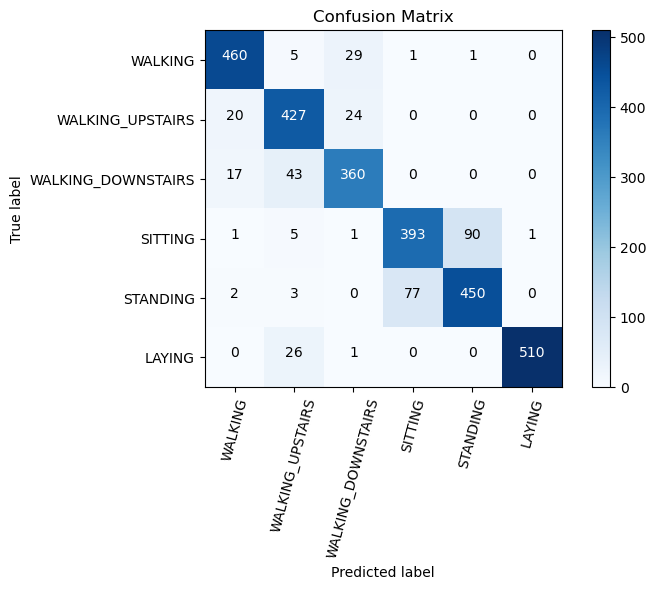

In [84]:
from sklearn.metrics import confusion_matrix

cat = np.array([1,2,3,4,5,6])

# Create the confusion matrix
cm = confusion_matrix(cat[y_test_comp], cat[y_pred])

# Get the number of classes
num_classes = 6

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add x-axis and y-axis labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axis labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the plot
plt.tight_layout()
plt.show()


> q) Comente acerca de los resultados y explique cual es la actividad que mejor logra clasificar la red.

-   Si se utiliza como métrica la cantidad de aciertos divido en el total de datos predichos para cada clase a continuación se presenta un ranking con el porcentaje de aciertos:

         'LAYING' = 100 %
         'WALKING' = 90.5 %
         'STANDING' = 88.61 %
         'SITTING' = 84.97 %
         'WALKING_DOWNSTAIRS' = 83.37 %
         'WALKING-UPSTAIRS' = 82.27 %

    Por lo que la actividad mejor clasificada corresponde a 'LAYING' con el 100 % de aciertos, mientras que la peor clasificada es 'WALKING_UPSTAIRS' con un 82.27 % de aciertos, lo cual si bien corresponde a la peor clasificada, no significa que esté teniendo un mal desempeño la red neuronal con esta clase.


-   La red es capaz de acertar un 88.46 % de los datos en general si se utiliza como métrica la divisón de aciertos/total.
    
-   La clase 'STANDING' tiene un bajo error de clasificación de la cual el 100% de los datos predichos erroneamente se asignan a la clase 'SITTING', lo cual al analizsar tiene sentido, pues las mediciones corresponden a la aceleración en distintso ejes y la acción al realizar ambas actividades son similares.


### 2.2.2 AdaBoost y arbustos

> a) Describa brevemente como funciona el modelo AdaBoost.

El modelo Adaboost consiste en combinar distintos _weak learners_ con el objetivo de producir una máquina de aprendizaje fuerte y robusta. Su funcionamiento consiste en primero, separar los datos disponibles en $M$ muestras de forma aleatoria a través de _muestreo con reposición_, una vez realizado esto se debe asignar inicialmente el mismo peso a cada muestra ($\frac{1}{M}$ en este caso). Con esto ahora se entrenan los $N$ modelos seleccionados y se evalúa el desempeño de cada uno, prestándo especial atención a aquellas muestras mal clasificadas, ya que a ellas se les asignan pesos mayores en cada actualización, con el objetivo de que cada modelo o clasificador se centre en corregir o clasificar de forma correcta aquellas muestras que fueron clasificadas de forma errónea anteriormente, formando así un _strong learning algorithm_.

> b) ¿Qué clasificador se puede usar junto con Adaboost?

El modelo Adaboost puede ser utilizado con diversos clasificadores débiles, considerando como clasificador débil aquellos simples y que tienen un desempeño ligeramente mejor que una clasificación aleatoria. Tal es el caso de árboles de clasificación con profundiad limitada y clasificadores lineales que no tienen buen rendimiento cuando las fronteras no son linealmente separables (tal como la regresión logística, LDA o el perceptron).


> c) ¿Cómo funciona el _learning rate_ en el modelo AdaBoost?

El learning_rate en AdaBoost, según lo señalado por _scikit-learn_ es un hiperparámetro que controla la importancia relativa de cada clasificador débil en el ensamble final. Un valor más alto del learning_rate implica que cada clasificador débil tiene una mayor influencia en el modelo final, mientras que un valor más bajo reduce su influencia.

> d) Separe el conjunto de entrenamiento dejando el 10% para validación.

> e) Entrene un clasificador AdaBoost con un arbusto (árbol de profundidad=2) con 300 estimadores y learning_rate=1

**Nota:** Este modelo no usa One Hot Encoder para las clases, investigue como preprocesar los datos del conjunto para entrenar este modelo. Puede guiarse con el siguiente tutorial de sklearn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py

Una de las razones por la que no se usa la codificación One Hot Encoder es porque el modelo AdaBoost a través del clasificador _arbusto_, puede manejar directamente etiquetas numéricas en lugar de codificaciones "one-hot encoder". Esto puede simplificar el proceso de entrenamiento y mejorar el rendimiento del modelo. Es justamente esto lo que se hace en la referencia señalada ya que se utiliza directamente el y_train proveniente de la importación del conjunto de datos.


Primero se importan los paquetes necesarios para los modelos que se utilizarán a continuación.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Ahora se vuelven a leer los conjuntos de train y test, con el objetivo de no tener problemas con algún procesamiento que se le hayan realizado en la sección anterior

In [ ]:
x_train = __load_X(train_paths)
x_test = __load_X(test_paths)
trn_pth_ = os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\train\\y_train.txt")
tst_pth_= os.path.join(os.path.dirname(path_), "preg2\\UCI HAR Dataset\\test\\y_test.txt")
y_train = np.loadtxt(trn_pth_,  dtype=np.int32)
y_test = np.loadtxt(tst_pth_, dtype=np.int32)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2]))
np.shape(x_train) 


scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1,random_state=69)

In [ ]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

In [ ]:
ada.fit(x_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

> f) Revise el error de validación con el conjunto de validaión.

In [ ]:
ada_val_errors = []

for ada_val_predict in ada.staged_predict(x_val):
    ada_val_errors.append(1.0 - accuracy_score(ada_val_predict, y_val))    

n_trees_ada = len(ada)

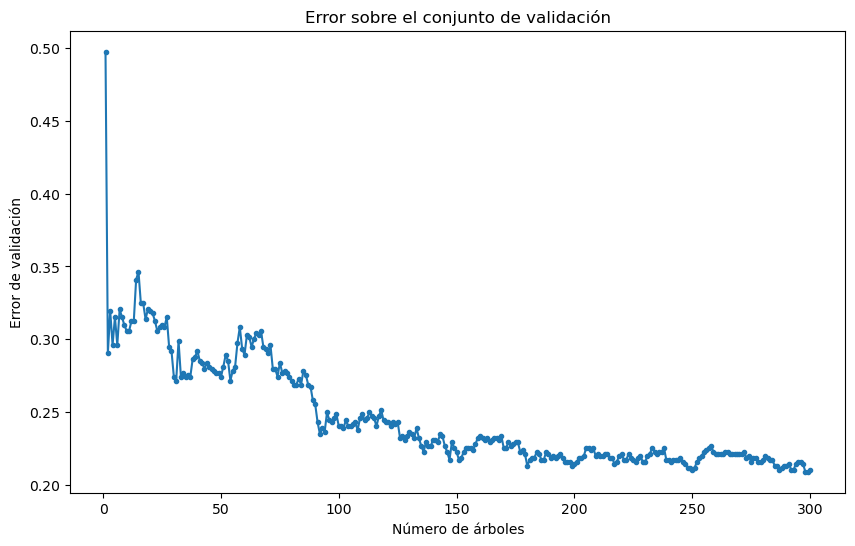

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_trees_ada + 1), ada_val_errors, marker='.')
plt.xlabel('Número de árboles')
plt.ylabel('Error de validación')
plt.title("Error sobre el conjunto de validación")
plt.show()

En este punto resulta importante resaltar la función ".staged_predict" que permite obtener las predicciones del modelo AdaBoost en cada etapa de entrenamiento. Dado su funcionamiento, se puede calcular el error de validación en cada etapa y así tener una idea de cómo varía el rendimiento del modelo a medida que se añaden más estimadores. 
Ante el comportamiento descrito resulta evidente como mejora el modelo a medida que se avanza en los estimadores, lo cual tiene mucho sentido al considerar el principio de operación del modelo _Adaboost_, ya que se puede apreciar como cada estimador va intentando corregir los ejemplos mal clasificados del árbol anterior hasta llegar hasta el final, donde se obtiene un error inferior al 20%.

> g) Haga la misma prueba pero ahora con 30 estimadores

In [ ]:
ada2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1
)

In [ ]:
ada2.fit(x_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=30)

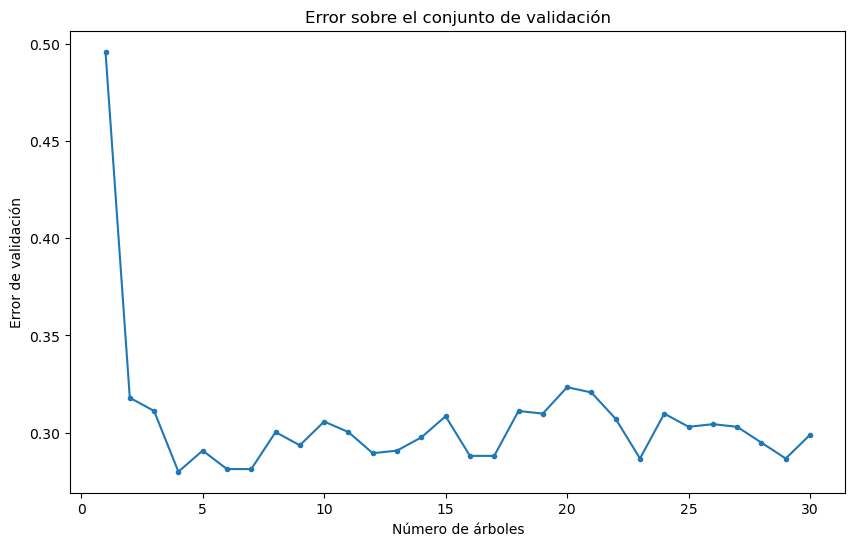

In [ ]:
ada2_val_errors = []

for ada2_val_predict in ada2.staged_predict(x_val):
    ada2_val_errors.append(1.0 - accuracy_score(ada2_val_predict, y_val))    

n_trees_ada2 = len(ada2)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_trees_ada2 + 1), ada2_val_errors, marker='.')
plt.xlabel('Número de árboles')
plt.ylabel('Error de validación')
plt.title("Error sobre el conjunto de validación")
plt.show()

Nuevamente se aprecia como el error de validación decae a medida que se avanza en el clasificador, dándole mayor importancia (a través de los pesos) a aquellas muestras mal clasificadas por los árboles anteriores. Sin embargo, dada la cantidad de clasificadores de esta instancia, no se alcanza el mismo error de validación que en el caso con 300 estimadores.

In [ ]:
ada3 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=0.1
)
ada3.fit(x_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=30)

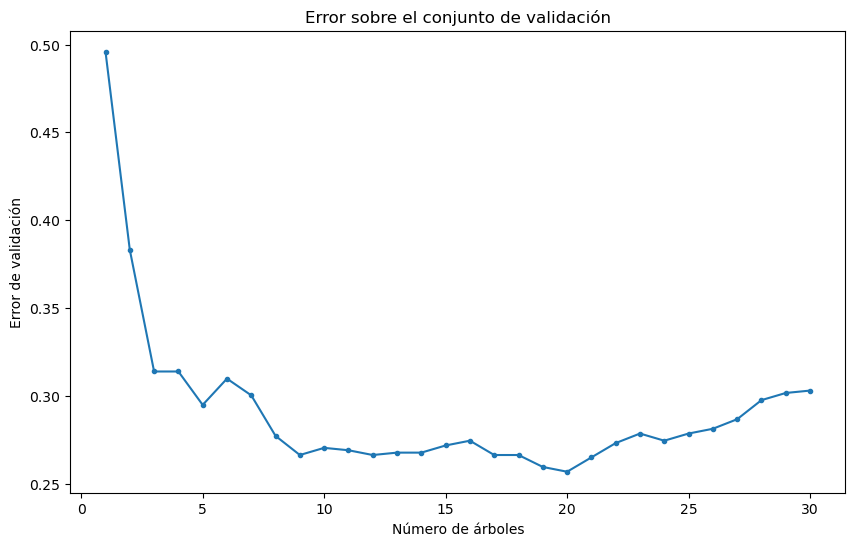

In [ ]:
ada3_val_errors = []

for ada3_val_predict in ada3.staged_predict(x_val):
    ada3_val_errors.append(1.0 - accuracy_score(ada3_val_predict, y_val))    

n_trees_ada3 = len(ada3)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_trees_ada3 + 1), ada3_val_errors, marker='.')
plt.xlabel('Número de árboles')
plt.ylabel('Error de validación')
plt.title("Error sobre el conjunto de validación")
plt.show()

De esta tercera prueba, se puede visualizar que el valor que se le adjudique al _learning__rate_ influye de forma directa en los errores de validación en cada etapa del entrenamiento. Por esta razón se puede mencionar que este hiperparámetro debiese ser considerado como tal para obtener su valor óptimo. Sin embargo, para los alcances de esta tarea, se mantiene su valor en 1 tal como se menciona en el enunciado. 

> h) Una vez encontrado el mejor modelo basandose en el error de validación, entrene el mejr modelo con todo el conjunto de entrenamiento, es decir, sin hacer _validation split_ y luego evalúe el modelo sobre el conjunto de pruebas.

Como se mencionó anteriormente, el modelo que entregó un menor error de validación fue el desarrollado con 300 clasificadores, por lo que a continuación se procede a entrenar el modelo con el conjunto de entrenamiento completo.

In [ ]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=300)

In [ ]:
y_pred_ada = ada.predict(x_test)

> i) Muestre la matriz de confusión y comente sus resultados.

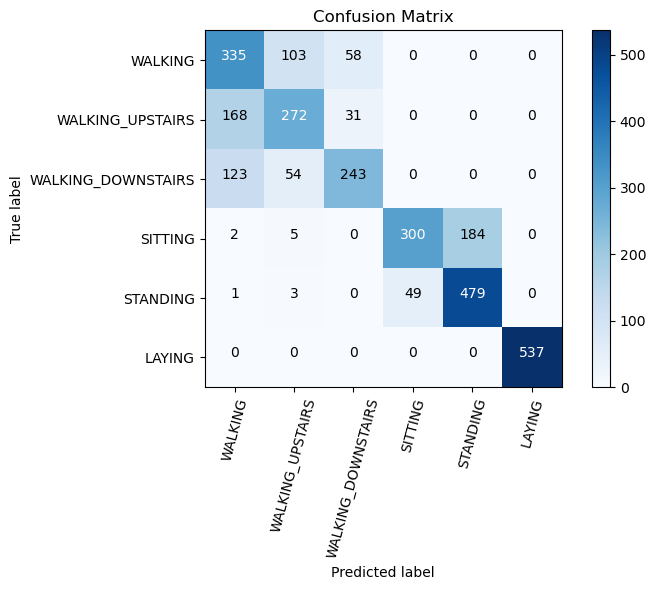

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_ada)

num_classes = 6

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, LABELS, rotation=75)
plt.yticks(tick_marks, LABELS)

thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

De los resultados obtenidos se pueden sacar los siguientes análisis:

- El clasificador presenta una tasa de acierto de aproximadamente 74% (aciertos sobre el total).
- Existen ciertas categorías que le resultan dificil de predecir al clasificador, tal es el caso de walking, walking_upstairs y walking_downstairs, las cuales tienen los índices más altos de errores entre ellas. Tal situación resulta con sentido por ejemplo, al considerar que quizás los sensores presentan lecturas bastante semejantes.
- La categoría laying fue clasificada con un 100\% de acierto.


## 2.3 Conclusiones

Comente con qué modelo obtiene los mejores resultados, ¿qué otros experimentos realizaría para intentar mejorar los resultados?

    En general, se obtienen mejores resultados con la red neuronal de tres capas y función de activación ReLu que con el modelo AdaBoost. La red neuronal logra tener una precisión del 88.46 % de los datos totales. Tal vez se podría considerar utilizar en el modelo Adaboost distintos clasificadores debiles y no solo arboles de regresión, pero el conjunto de clasificadores debiles dependería del tipo de problema a analizar. En este problema en concreto también se pudo haber implementado regresiones logisticas en el AdaBoost para así contar con más variedad en los las salidas de cada clasificador debil

    Además, mencionar que si bien se obtuvo mejor desempeño con la red neuronal, ambos modelos lograron tener una precisión del 100 % para la clase 'LAYING', lo cual se puede deber al tipo de actividad que corresponde y la diferencia natural que tiene con el otro tipo de actividades existentes en el target.
